# SHAP Interpretation Report: LSTM
This notebook provides a post-hoc explanation of the model's predictions using gradient SHAP.

**Model Architecture:** LSTM
**Analysis Context:** timeseries
**Dataset Scope:** whole


In [1]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Data provided by the explainer
all_shap_dict = {0: [[[[0.00013000612759888646], [0.00024086305543204254], [-1.7276264542116e-06], [0.00025023690551122376], [7.203031608334674e-06], [6.488764604057152e-05], [0.006020831608691452], [-0.00010515708237705643], [-0.00023938703423783195], [-0.00014210347559522374], [-0.0009754425178935208], [0.007906766968886847]], [[-0.0010816750778710623], [-0.0018752837704110233], [0.00016063240160261533], [0.001047115785399715], [0.00013321232503723634], [-0.000676612701809437], [0.011737420809187382], [0.0010890085772379413], [0.0009990543390832195], [-0.00025608201915560704], [-0.0010282857688092791], [0.014763055073699212]], [[0.0019509632367413962], [-0.001526265496461928], [-0.0010071985498658995], [-0.0001439201389428951], [-0.00044452989772899865], [0.0007200271461536577], [0.024276594641152536], [0.00237319764157093], [-0.002056034071275214], [0.0007173322993143055], [0.005666909516900219], [0.008636196267566586]], [[0.015061921683158057], [0.04765564790886295], [0.0153342728717628], [-0.010680702736845505], [-0.0010139743233056268], [0.005198642106537401], [0.02233400186961429], [-0.0007157979642349343], [-0.00010835712482184747], [-0.0018881729893125132], [-0.017776059434477565], [0.030191357582382103]], [[-0.001160067724168254], [-0.0969487479381503], [-0.011523745010438829], [0.0006645939986457994], [0.001269665184679285], [0.04040308868203705], [0.03625509646336275], [-0.0038919065148495815], [-0.0026611478740369604], [-0.00998084198253049], [0.01238701717737462], [0.02190698277275822]], [[0.17276286333238816], [0.21197344631593434], [0.02040113643738882], [-0.014907284862305602], [-0.026929502943021048], [0.03442825186377811], [0.05438129904166176], [0.03705312529858519], [-0.024102226692803822], [0.009699513424856343], [0.016549333937764157], [0.028792090810530354]]], [[[0.0005674851891358116], [0.0019994855676698474], [0.00022321479455098868], [0.001187933812632179], [9.97436289730813e-06], [0.00024337075950748487], [0.0026326226882211457], [-0.00012122230244272086], [-0.0002010301699606877], [-0.00026621156509832244], [-0.004077131411705148], [0.011361272743098245]], [[-0.008146616313263357], [-0.009234467704558382], [0.0023390130576024138], [0.003993978297497193], [0.0008499355375424398], [-0.00260929872179538], [-0.010831995840287299], [0.0008813273137282971], [0.005888122490405635], [-0.0017684111052505324], [-0.007129525469962221], [0.028651016915759185]], [[0.01828336559263172], [-0.009126531337723488], [-0.0093557487574194], [0.0070377556633552905], [-0.0025366572987909467], [0.01643361188209723], [0.033696194564411495], [-2.720657587483577e-06], [-0.0012884086791707832], [-0.003239884372863957], [-0.005942373940850632], [-0.031186675728037207]], [[0.06861004404247349], [0.1855450082004479], [0.03078360416478992], [-0.03626132804159025], [-0.012705146994499117], [0.0017693205778811687], [0.03051476184406557], [0.013661614412289328], [-0.004452694491895566], [0.010584082650764883], [-0.020383375864802274], [0.047015521647819615]], [[-0.11517263121247386], [-0.2703429899988806], [-0.0020667504886864143], [0.03291447943349543], [0.024295224985464575], [-0.0008599458624963088], [0.004214587001260734], [-0.02266136811773485], [0.028282949991973387], [-0.01803910604979292], [-0.0016809473474279635], [0.07320454667148713]], [[0.39345103469932147], [0.37948771477562415], [0.04221760506064935], [-0.06381561095418775], [-0.04774532569062956], [0.02526854049236671], [0.04957767628458375], [0.0339665579655599], [-0.04186028502034964], [0.008481197304672736], [0.00824296773340368], [-0.0743525502031789]]], [[[0.0021434827435570527], [0.00483553305155981], [0.002695109274154261], [0.005853276438731908], [-0.00034040202349943353], [0.0013809158056712805], [0.00536746546249092], [-0.002199507533237092], [0.0015185242610129034], [-0.0029684529183464847], [-0.015328401195441701], [0.013296429717310937]], [[-0.032046147532063425], [-0.07513224717488494], [-0.002783936563822836], [0.0007962472617872183], [0.0024232897806206292], [-0.015637410080904114], [-0.015334182030601771], [-0.002624074726383916], [0.006909903886547038], [-0.0016822516442082855], [-0.0008821348956528565], [0.015534099915780378]], [[0.09530865995257294], [0.10595698061005743], [-0.0032833384036698708], [-0.015254298912655291], [-0.016398118108303675], [0.056733665166956875], [0.053646622491787144], [0.010035028401054403], [-0.016167721533760247], [0.00039317786512494025], [0.001826961447820859], [-0.010307140224418365]], [[-0.01897501272112102], [0.050885421369442935], [0.04034264831626236], [-0.011984081049155422], [-0.011226703608079298], [-0.0006902169449009125], [0.0022321779464593793], [0.01334476976781636], [0.010767350764692091], [0.00021049181457057485], [-0.018669638519674518], [0.10817037434751375]], [[-0.11270617285185029], [-0.2449994993334747], [-0.003908421283387546], [0.004594980400805489], [0.014761277468043765], [0.0018709366326681751], [0.02501047940434012], [-0.0568378519713715], [0.037719150786789356], [-0.024066226293352685], [-0.0390329731155223], [0.0467474381763342]], [[0.5253610962087056], [0.7235530888606186], [0.07681361861833334], [-0.08476329193495363], [-0.06565890115459785], [0.06355449932466543], [-0.006434063012675588], [0.06381737450616533], [-0.054233595907919346], [0.008381443831413387], [-0.003711157754421548], [-0.10103975928427043]]], [[[-0.005430891555276476], [-0.0018314834522190947], [0.003965195645488527], [0.002958805881407827], [0.0005783408950936784], [-0.004564032736878157], [-0.0012622214885972707], [9.44165784914506e-05], [0.0028498803381277293], [-0.0005872969334190798], [-0.00637419709358605], [0.010744971342647824]], [[-0.005538046976479718], [-0.04326113419019733], [-0.004430396125934094], [0.007603382279715036], [0.0020136426651256993], [0.003603064770445989], [0.013483906055149306], [-0.003725201715553261], [0.0023743743874721315], [-0.0028101694686492834], [-0.002922017255217526], [-0.00672812264476695]], [[0.05573617499141298], [0.09238479772918186], [0.011972622164898668], [-0.014081287565375881], [-0.012851491150047014], [0.009934302224239334], [0.02045429842261538], [0.010456040458040146], [-0.018160627698319307], [0.005110140430891331], [0.008643413596439614], [0.009646252563428475]], [[-0.08267576112308328], [-0.0981712509739324], [0.013219783677498235], [0.013684410620334033], [0.010511788981059757], [-0.0009217182138580874], [0.0022360124804008223], [0.006863383654036464], [0.020541423699314193], [-0.004835403511826314], [-0.006261127642718498], [0.09050223631579339]], [[0.09499033556161215], [0.06203192087183334], [0.021436220810017757], [-0.046376282857556884], [-0.024426001881262073], [0.016536409278748127], [0.020208303819452454], [-0.042414341838056736], [0.0002706554537741704], [-0.01140448864763194], [-0.032544868514748276], [-0.035953513126637665]], [[0.28010540038331483], [0.35852303563143983], [0.028566344279307456], [-0.010905371462958047], [-0.0347720013755787], [0.009092640202637108], [-0.03920277922785806], [0.058031561372702906], [-0.036173010856871246], [0.011501241422255289], [0.02406272675858835], [0.04268555228991106]]], [[[0.01931901511286603], [0.033623788007461776], [0.0037738605826692397], [-0.002705793877785063], [-0.0032156015298362792], [0.005649944815268197], [0.009827123458584233], [0.003993844369847355], [-0.003418308194198246], [0.0013218300898864901], [-0.001380290756973727], [0.0036303274498195666]], [[-0.025219774899173802], [-0.03297008392984546], [0.006874700767150473], [0.003682803694280037], [0.0023827492272727375], [-0.002711210585074042], [0.0052197885451075385], [-0.000502377509363741], [0.006361102221100871], [-0.0021479614670457], [-0.002133165226961555], [0.025505132056229823]], [[0.035357167743588505], [0.016381759999233858], [0.0067511496549345], [0.0014711685620134752], [-0.006974059688520966], [0.003891598644756831], [0.007098534257117439], [-0.0048690250841904046], [-0.0028145328026376428], [-0.003436998923580456], [-0.006899589055127655], [-0.00016020619369753908]], [[0.0312679610720398], [0.055680576741583686], [0.02224683270627324], [-0.014774401190942867], [-0.0037199760310271494], [0.007099389333284939], [0.011851564157645624], [0.015048331655201981], [-0.007812706066386513], [0.0016874389417484066], [0.006372846765352074], [0.04511312641740977]], [[-0.05216524239295045], [-0.1995586865476202], [-0.02425771541061763], [0.010137471057483012], [0.006993455057762654], [0.00012755338551219853], [-0.001274741002813004], [-0.00701900780489826], [0.007721419721023721], [-0.008948086155239818], [0.004577675655091498], [0.08336603332372947]], [[0.32879734657617665], [0.3000196738893183], [0.06175586499523391], [0.012691074373875167], [-0.03693579920475138], [0.006973715913704134], [-0.09709809529957017], [0.04871813025079215], [-0.02744716752450917], [0.005539322391736458], [0.012483048076441648], [0.025631476976126683]]], [[[-0.0030154794788964014], [-0.0010526769513962823], [0.005104387345417998], [0.0032858640599283586], [7.556071744028013e-05], [-0.00032884316903542335], [0.0014458645514352911], [0.0006271726603080134], [0.000916999475287264], [-0.00039578181548253355], [-0.001589402443976931], [0.008090055261834766]], [[-0.005043210977650341], [-0.01579568965394051], [0.0012857231990244166], [0.001377153618890866], [-0.0002743942893225986], [0.00024852771558967374], [0.006365680390110745], [-0.0031904760973360596], [0.0012883839402991488], [-0.0012771180277315278], [-0.0021118638336105272], [0.007700075214742284]], [[0.03994821326361561], [0.05204679228408748], [0.010612323314036744], [-0.001721488503902453], [-0.005093343404525339], [0.006693063274347108], [0.0010586734820264459], [0.009890669691108038], [-0.008317783109705103], [0.0012215193370373545], [0.005089020218857183], [0.008074754752231246]], [[-0.02916413540208634], [-0.07753089879552232], [0.005816014066767557], [0.02259885957387436], [0.006614752202055319], [0.00010890603896062546], [0.006133258481262063], [0.00346722201395271], [0.0051356398968828605], [-0.0021773020588949834], [-0.0005304779626974219], [0.056187384044719485]], [[0.04602720555780762], [-0.0008133645378973257], [-0.008695194782345449], [-0.002586062503102272], [-0.013596490523485818], [0.00019619940993179932], [-0.047273534419554154], [0.01728425820420974], [-0.006265733070630164], [0.001383975741468737], [0.005734560441423227], [0.06292752450178661]], [[0.07820548221644899], [0.14709464790149973], [0.06400079513302863], [0.030378905414816856], [-0.019386810321302742], [0.018437729579740676], [-0.10791542924561505], [0.0292516252227216], [-0.012477068829423019], [0.003914959715545212], [0.012746426726343907], [0.036671007224194245]]], [[[-0.004236658865167415], [-0.006136702128934178], [0.0004956904192024603], [0.004228388801485672], [0.00032085860733599826], [4.7299560189956524e-06], [0.0018973169465963766], [0.0013168056019151476], [0.0012037187982378685], [-0.0007925887722028517], [-0.0006908639289341454], [0.008290382400216558]], [[0.0017356325602303935], [-0.0015111475121192064], [0.0012979512781123978], [-0.001531605051393849], [-0.0028302811460215083], [0.0013684152041823457], [0.0014831466667405157], [0.001061787496746018], [-0.00028266950333759013], [-0.0006702651644839637], [-0.00046770934873897386], [0.012374049019169428]], [[0.010853075702430897], [-0.004333405740669604], [0.0010141915351027065], [0.00456357175901661], [-0.0016617840340556228], [0.0019379493273099437], [-0.006784914674131958], [0.006579291307611694], [-0.001993778143867179], [-0.00015158087307804517], [0.002752957948458419], [0.027635686003313932]], [[0.006593588333115072], [-0.00824773904765096], [0.011566416275513847], [0.008362607020449076], [-0.004712914172578918], [0.0016303744288969602], [-0.025142685814869968], [0.009497922264050393], [-0.0005042401033979875], [-0.0012387029116409632], [-0.0009867554616492654], [0.060342768822165035]], [[-0.0031085637888889424], [-0.036573955651264256], [-0.011995950004308784], [0.005142355723617297], [-0.007405106568825249], [-0.0073282613856212354], [-0.09731266312704961], [0.02288539424421943], [-0.00094308857709842], [0.0017983039160966586], [0.009766298647204272], [0.08810947946337289]], [[0.0969513025866462], [0.1363077496327183], [0.03178762349663492], [0.011341592885845455], [-0.02365643418919981], [0.026798282825115146], [-0.17092652631774555], [0.020371595714099123], [-0.006016259310579006], [0.0030225821644263213], [0.0015043388637797205], [0.032532094048889675]]], [[[0.000547807543070133], [-0.0005337456854734285], [0.0007034766046361402], [0.0012484996198790887], [-0.0004132017654544331], [0.0004925473077027243], [0.0005899785139729911], [0.0019717556411376707], [-0.0004146143987819955], [-0.000112275547553739], [0.0006187175118830879], [0.0070767329833515925]], [[-0.0026729480956180713], [-0.012081245103385416], [0.00047053151702765056], [0.00515167186902688], [-0.00016555530820766944], [0.00013424868604132063], [-0.003459927190082182], [0.0035406271082786987], [5.622129659414849e-05], [-0.00030805126440801864], [0.0010740709340891445], [0.014037157397867544]], [[0.011068103974049457], [0.0034042897072032157], [0.005789778403608639], [0.0031181256104670855], [-0.002807623393165818], [0.0010439494006679647], [-0.015825235136204065], [0.00430106084179513], [-0.001509999877732533], [-0.00022766715409837526], [-2.5169738273906902e-05], [0.02372050054319872]], [[0.0002256406715959277], [-0.01023998868816131], [0.0030623576615206815], [0.006257042635757461], [-0.0023619202741312155], [-0.0008030914602225226], [-0.04161014725928316], [0.008176754217606103], [0.0004864221558078291], [-0.000731430187007113], [0.0005719069997885602], [0.04165770205376301]], [[0.012692824522918967], [0.009224543665275772], [0.0003548638714875435], [0.0029217272491104973], [-0.005907292253658683], [0.001961211490019455], [-0.08282513458315993], [0.011332429819509564], [-0.0018475165416423228], [0.0023539128710004316], [0.0032015863748897826], [0.03751184144147293]], [[0.034371914637703636], [0.03569673799403135], [0.013802757824837707], [0.003984176948160115], [-0.0050886719512053015], [-0.0002308220037283549], [-0.08552464465968232], [0.001030452916810781], [-0.0015353829258154999], [0.0012319542774900426], [0.002547380007122981], [0.019177485465274244]]], [[[-0.0013597128931799544], [-0.005210174924892275], [0.0002444802296324193], [0.003672041457112234], [0.00034220776587717545], [1.9568985997100068e-05], [-0.0011769690141908524], [0.0017475299343062325], [-8.15825209779622e-05], [-6.881754808417371e-05], [0.0005692925980126353], [0.006700741427119885]], [[-7.997052328352995e-05], [-0.004200736688508133], [0.0015274833322962312], [0.003097045959537268], [-0.00061481379289847], [3.1513704358538406e-06], [-0.009609590557504023], [0.003534406632805162], [-0.00024154810417342988], [-1.63970033889209e-05], [0.0006803599965917779], [0.012577679705686247]], [[0.0027572256943084778], [0.0009778758418625222], [0.0036490089855467983], [0.0030455252650746973], [-0.0019783763359453536], [0.001122403465919051], [-0.025267114788440067], [0.004656568753414124], [-0.00037135435835722585], [5.975360181359653e-05], [-0.00013900991457729296], [0.019343094689136964]], [[0.005265067278976517], [0.004362094311844958], [0.0029903599384564195], [0.0023104093552950193], [-0.0022878909312340507], [0.0008965500466754458], [-0.03736111408097957], [0.0037842965472216], [0.00017262089032010376], [0.00012174276682415081], [-0.0004963899231152958], [0.022848609311778453]], [[-0.0003861767264468349], [-0.004081384175505784], [-0.000946041695818864], [0.0011325481087622626], [-0.0012278766989633847], [-0.0014898037181968538], [-0.049546680483761076], [0.0013533694807353292], [-0.0006854886071614461], [0.001287039657480214], [0.0027652791661653226], [0.02389765651185299]], [[0.006889143901583158], [0.004667706330097802], [0.0004659411708735955], [0.0009802397462560536], [-0.0031896764122581957], [0.0042266957946813025], [-0.07174092735769884], [-0.00525395853904034], [-0.0010403219079350016], [0.00041918903437716137], [0.0009379322874297785], [0.008623120161556436]]], [[[-0.0003262793968142622], [-0.0020908539483107374], [0.0006234773704884996], [0.0022537234228496472], [-4.2673477104086235e-05], [-5.417530271604928e-05], [-0.002986709914381592], [0.0014419763110396786], [-8.455146103014101e-05], [-7.888797313258208e-05], [0.00011507665376632], [0.005942661048429513]], [[-0.00044123491529656715], [-0.0025183908528770703], [0.0011261082241997224], [0.001866239852086042], [-0.0004961440630268922], [-0.0010789398361177847], [-0.011675019292801302], [0.003193429403037304], [-1.908394934290921e-05], [8.606705597184467e-05], [0.0005950663123056964], [0.009757639989383764]], [[0.0037577947997635263], [0.003735028414722946], [0.0016469484365619395], [0.0011037795242345402], [-0.0014889751851212432], [0.0009655034044066759], [-0.022292127827299283], [0.0031399854100867004], [-0.0002471713220853723], [0.00020930839009580625], [-0.0003075804601655272], [0.011047790145888905]], [[0.0026070049985062183], [0.002124468871773928], [0.001739167509603541], [0.000922480926612597], [-0.000955042612298204], [2.6248853048069526e-05], [-0.024046211891778316], [0.0008769991237952], [5.802132332262938e-05], [-0.0003527957283839137], [-0.0009499943089971895], [0.01386419458129277]], [[-0.0022303213725943386], [-0.0029203444962592885], [-0.0001909288261401941], [0.0004594624141535254], [-1.1531901929437833e-05], [-0.0026823769681713176], [-0.03387216511297513], [-0.0023202973817455434], [2.7979287101141324e-05], [0.0011736098500636184], [0.00295851015400546], [0.017081760643497618]], [[-0.009289138786152775], [-0.009472921759184906], [-0.0006962994607237538], [-0.00014540317449308882], [-0.0005832278725638732], [0.006874383237972011], [-0.056514815822425124], [-0.007220783708273751], [-0.0014916847899236602], [7.066033339487507e-05], [-0.0010205644402066286], [0.002846192862763758]]], [[[-2.2651332608835616e-05], [-0.0006625294263868718], [0.00025621583575841675], [0.0010563672343425928], [-0.00022697023649100075], [-0.0005461827080470538], [-0.0032361665434636603], [0.0009509091099331886], [1.4613885591734642e-05], [-6.529482228859541e-05], [-2.7969043677255906e-06], [0.0037222523106101323]], [[0.00034736658069606783], [-0.00013728825949504205], [0.0005758878948465163], [0.0006109490405077409], [-0.0004049070130535972], [-0.0005163318828436628], [-0.008334558102624165], [0.0017486711060707813], [4.070901346410881e-05], [0.00012289444970113732], [0.00028923561536893706], [0.0054048256320526926]], [[0.0009004656933239339], [0.0006282754752506109], [0.0005281559563207335], [0.0004024511379870844], [-0.0005651422385666081], [-0.00019215082779536484], [-0.012630544474067487], [0.0012282537003188909], [5.560599962347077e-05], [0.0001408600239482215], [1.1572909111739155e-05], [0.0060350311330802184]], [[0.0006537305267947469], [0.0003085114479011206], [4.416692335615783e-05], [0.0002974422256367586], [-0.0005849400691036062], [3.302803937442729e-05], [-0.014613413063957883], [1.8457121391964307e-05], [0.00015781634357214837], [-6.323437408962273e-05], [-0.00043596480420069264], [0.007369777731006696]], [[-0.0005070265147956277], [-0.00011110497539341145], [0.00017739007138685588], [1.3902980799422e-05], [0.00015940924138672393], [-0.0009830465835167464], [-0.017753097454580338], [-0.002781165405924367], [9.805399442583084e-05], [0.00035885562185472585], [0.0011532835538428043], [0.008676814783882655]], [[-0.008847139690530524], [-0.007420481515360643], [-0.0007512246323171802], [-0.0002109017280735743], [0.0008110000698524717], [0.0011895163058689624], [-0.027660659815910833], [-0.006146093252406549], [-0.00030540083561891043], [7.251240055309892e-05], [-0.00018465413688793558], [0.001403469521942941]]], [[[0.00017775455281701327], [-0.00016423411279478697], [0.00020710174242771675], [0.0005645923943599784], [-0.000246363412807625], [-0.0005963977464395719], [-0.00411059640476561], [0.0007856149796718204], [-3.160801016159516e-05], [-2.539297863896458e-05], [-9.14771696540036e-05], [0.0035832850609351275]], [[-0.00023550343182400144], [-0.0006165659736857242], [0.00036550219010417066], [0.00038613615182911523], [-0.0001561713225415811], [-0.00021823931183387953], [-0.009745093797851576], [0.0015320771086813512], [0.0001169947055898733], [0.00019201416875364106], [0.00039575032150088526], [0.0055720134239438494]], [[0.0007651304030575712], [0.00045453720283516086], [0.0001341207337059823], [0.0002639372791483247], [-0.0004963879849326482], [3.597274830430827e-05], [-0.015379395924454885], [0.0006441832804515737], [-1.4499718405669698e-06], [0.00017400811782315403], [-0.00015979511424873106], [0.0058069213203452265]], [[-6.930846773880503e-05], [0.00018292648594617883], [-5.378062244701533e-05], [2.746994041813199e-05], [-0.0002896981416501404], [0.0010560550647124374], [-0.01527863249398271], [-0.00038436541311566067], [4.9726620761901387e-05], [-0.00030934588058689993], [-0.0009404092600174782], [0.008304286195649551]], [[-5.221711656118879e-05], [0.0012700238561140808], [0.00013327439617013794], [-4.975881806423655e-05], [0.00020238719466935946], [-0.001829320200598997], [-0.020587730846487434], [-0.004265759798144144], [5.311186338702138e-05], [0.0007943000885801397], [0.002599354816134788], [0.01195339880272186]], [[-0.008623197683413854], [-0.0086660725482801], [-0.0006301639041632823], [-0.00010395560370425869], [0.0006686292365111902], [-0.0030313092512311095], [-0.039105993005863315], [-0.007653924154488289], [-0.001078701167499476], [-3.680670395923982e-05], [-0.0007857299081251874], [-1.499973052343416e-05]]], [[[7.357419295165419e-05], [-0.00010071970458473188], [0.00014666710537936312], [0.0002643247097060687], [-0.00011255248355320674], [-7.342626452462417e-05], [-0.0034577700958500087], [0.000380508505015675], [-4.2335977630009045e-05], [-5.542887652946622e-06], [-8.242266553252688e-05], [0.002711626884272914]], [[-0.00015685049223062957], [-0.000287460106402463], [4.699123439629808e-05], [0.0001861146783448498], [-0.0001233827555843873], [-0.000506634241354381], [-0.008316511189105574], [0.00045845776404606964], [0.00013670655607359454], [0.00013906944790165236], [0.0003275993937461141], [0.004364295743136533]], [[-0.00012663161493669552], [-0.0001266869617956123], [-1.0752051904760517e-05], [1.7699127819566913e-05], [-0.000232047222161513], [0.00012662759693966743], [-0.012371810691102771], [-0.0002909580487231382], [-3.0457238418093434e-05], [8.750303198070954e-05], [-0.00021151813022818368], [0.004551528724508305]], [[-0.00015840757317227866], [7.380578394352703e-06], [-2.880242012747173e-05], [-6.899127435911768e-05], [-1.7956822922335393e-05], [0.0003394532703013847], [-0.011498746432608661], [-0.001021217548999113], [8.361188386330256e-05], [-5.762161495052932e-05], [-0.0007032701050961765], [0.006675341258013694]], [[-0.0013134526744641192], [0.0004367473972522262], [6.984202335592386e-05], [-4.159731195728679e-05], [0.0002409630304327315], [-0.00033960919692530895], [-0.016118849805642172], [-0.005373884627558512], [-6.504756568537325e-05], [0.0004177515447820589], [0.0016405387391116957], [0.008911893036382613]], [[-0.007163340515874081], [-0.008101754199815587], [-0.0006074035580635006], [-0.00017363470821780519], [0.0005864359601219463], [-0.0028372582355205684], [-0.025534820411256084], [-0.00748552596429923], [-0.0015939427981641536], [-0.00010345508468158776], [-0.0007905827575961192], [-0.0002788533399847873]]], [[[6.71028386456104e-05], [1.4731805428371474e-05], [2.338894885122731e-05], [0.0001741498953615749], [-0.00014310025689427864], [-0.0003791692256025016], [-0.0038424678753250885], [0.00022639331374422808], [-9.551923097681957e-05], [4.2564222568160306e-06], [-8.366702959265645e-05], [0.0026603983812364955]], [[-8.936897820094203e-05], [-0.00012831562742022409], [-7.505344187155807e-06], [3.310944135720587e-05], [-6.418910851395266e-05], [-0.0007669497303602543], [-0.008706719760765574], [0.00011662564871684707], [0.00012854470785499635], [0.0001449977046445317], [0.00032312896476513237], [0.0045805170335371246]], [[-0.00017431213301538067], [-0.00019304012179503324], [-4.472856547998828e-05], [-3.934934733052637e-05], [-5.0366902396268995e-05], [-0.00010917212339652747], [-0.012496552573055817], [-0.0007080481881900292], [-2.151845446147927e-06], [9.203384733513087e-05], [-1.7641587664367333e-05], [0.004682897606604387]], [[-5.0846370686240825e-05], [-4.50779850223685e-05], [-7.082455700272649e-06], [-5.8028771696347666e-05], [4.8146289116805274e-05], [0.0002827385289267933], [-0.011475678417739433], [-0.001181092663303826], [-2.7259915896982342e-05], [-0.00016466253518378955], [-0.0010320760743079969], [0.006774565846355808]], [[-0.0011865581470570765], [0.0004832180423885912], [5.027983157805571e-05], [-5.3885011352237065e-05], [0.000199124550965493], [-0.0002063305958897589], [-0.013422178308353556], [-0.006902497958878252], [0.00041923954985535294], [0.0006426806256225302], [0.002272706859283056], [0.010269937904713502]], [[-0.007079940560697233], [-0.008070373074043116], [-0.0005829184057683529], [-0.00012986029991198788], [0.0004925634641953464], [-0.003145557282443256], [-0.026116473302750416], [-0.007784138994422521], [-0.0015746971898777998], [-0.00031116516248546326], [-0.001258400880625629], [-0.0009571309196422903]]], [[[1.1879412945642776e-05], [1.4469204229967995e-05], [1.6031775808363207e-06], [3.306811680012711e-05], [-8.248264275787144e-05], [-0.0005670945774308371], [-0.004209659521811492], [7.840915113646303e-05], [-8.281825210708448e-05], [-1.7494323204560933e-05], [-6.507625572571778e-05], [0.002857383957888085]], [[-0.0001155831648805621], [-8.584418111030258e-05], [-1.7425808637676517e-05], [-2.5589669159239082e-05], [-2.602898141204938e-07], [-0.0004581873332348874], [-0.00939387117342677], [-0.00047412552455773746], [6.348685497452332e-05], [0.00013948778783958213], [0.00027855077143320103], [0.005035146655298622]], [[-0.0002797905580536544], [-0.00023849678360662055], [-2.663418928801116e-05], [-4.9665058313015576e-05], [6.616526750460861e-05], [-6.547108143791107e-05], [-0.01327326798655744], [-0.0015761803097968671], [-3.305870427001629e-05], [9.026125081159725e-05], [-2.4236320735263244e-06], [0.0060197183121084245]], [[-0.0008230856030173773], [-0.001104037048280386], [-6.260931059955807e-05], [-9.568939914024901e-05], [0.0001809410019162513], [-0.00033950298617733634], [-0.013259084105265027], [-0.0027086686917568536], [3.3202577306973254e-05], [-0.00012052626999912441], [-0.0008075979406755788], [0.008529635855413015]], [[-0.00013347513798296965], [0.001500760717799391], [0.00017883607034488997], [-4.914487027749667e-05], [0.00019379518840454058], [0.0009032404014476777], [-0.015285971696803943], [-0.010558148668447877], [0.0002794650794542355], [0.0006982561284934418], [0.002073676333283983], [0.011757698287415207]], [[-0.01324848707925364], [-0.015107047861657815], [-0.0007548617768896791], [-0.000246457062876416], [0.0014491164816699978], [-0.003918520981972109], [-0.020012997304057284], [-0.014142608473740572], [-0.0012644127118526089], [-5.592745950159433e-05], [-0.0014262146811611636], [0.0012370893178679887]]], [[[-5.75450786032556e-07], [8.009436617514029e-07], [-2.935344754255342e-06], [-1.674223873173614e-05], [-2.258842944537453e-05], [-0.000553069692419816], [-0.005221415817331487], [-0.00013726015447050775], [-9.839309760453096e-05], [2.272376921030335e-05], [4.6835943186550605e-05], [0.00332224184970304]], [[-8.311295257275909e-05], [-7.1387034849712e-05], [-2.4611354199013383e-05], [-2.833197736410394e-05], [3.397261107826466e-05], [-1.2460624578090789e-05], [-0.011439104567101574], [-0.0012093650797902673], [9.079717975336906e-06], [0.0001853342742801254], [0.0003086839385113468], [0.005584522311819528]], [[-0.00011688179540415347], [-5.546275181979567e-05], [-3.621361576116489e-05], [-5.5367967982049646e-05], [5.9239181582871365e-05], [6.0406156291426406e-05], [-0.013074502467592035], [-0.002138721789051989], [-2.4925090665299683e-05], [-1.3666243434785133e-05], [-0.00026554465607533066], [0.0070469028373370554]], [[-0.00015977095001857127], [0.00030580989400343377], [-5.949463989142213e-05], [-0.00010291687390909774], [0.00010553241026692882], [0.00020444305863938716], [-0.012354542530817844], [-0.0038979343932056664], [4.335383383818251e-05], [9.744848510316969e-05], [0.00021265783493193231], [0.010366046084217645]], [[-0.0020342788400826263], [-0.0006626242150468152], [8.315682204734942e-05], [-6.259472247739688e-05], [0.0003218658805242959], [-0.0006324168181250045], [-0.015567552704487776], [-0.011468618623658701], [-6.910761177401324e-05], [0.0005562190899648687], [0.0013627068058039906], [0.011732364079613393]], [[-0.009235075807307811], [-0.009541045704064811], [-0.000941762729801036], [-0.00028919202858085873], [0.0008811929445096748], [-0.003475851082710194], [-0.011820546647033603], [-0.010916798845890032], [-0.0007660241384479876], [-0.00010468321097543656], [6.326258916174929e-06], [0.004249957276266944]]], [[[5.5157746969622755e-06], [1.6216840562372482e-05], [-4.5269124014217883e-07], [-1.9096864320879355e-05], [1.2758058612443502e-05], [3.4356969458261576e-06], [-0.006378051320282079], [-0.0002923097515312535], [-0.00022016322212264723], [-4.014921173159514e-06], [4.0845603247942e-05], [0.004767106617788507]], [[-0.00014380430217965747], [-0.0001534853251494007], [-2.2807642790315685e-05], [-3.342343500574468e-05], [5.466272669170729e-05], [1.1998529070481459e-05], [-0.014357797370221224], [-0.001980631589118847], [8.241696420673225e-06], [0.0002676880871799725], [0.0006546291456903042], [0.008565085323401748]], [[-0.0001801018737942496], [-0.00020762823780505707], [-2.5484326675649983e-05], [-6.240779565515973e-05], [8.646075210813134e-05], [4.946420530796856e-05], [-0.017815149802175415], [-0.003384432553591184], [-0.00015782926057064425], [0.00019126266535609863], [-0.00017692563815812235], [0.009671759171068299]], [[-0.00038902891761130804], [2.28286007759264e-06], [-5.529313166301836e-05], [-9.520731082389558e-05], [0.0001553098050285608], [0.00013611308368781467], [-0.014568392276903583], [-0.0038359087354925157], [-9.65753267457306e-05], [-0.00036334037373427516], [-0.0010268121583495216], [0.014231711026572249]], [[-0.0007251863245447929], [0.0014239315658528264], [3.6387064099882556e-05], [-9.110766185294786e-05], [0.0002863181898756253], [0.00033045157775406063], [-0.014891495021841103], [-0.01611569988804122], [0.00022228930662261087], [0.0028394142542560808], [0.004259898026120606], [0.02003571401963407]], [[-0.011023129298335255], [-0.01372707637949448], [-0.0009164913670110819], [-0.00016974243004250504], [0.0010996633207066557], [-0.00502583542472818], [-0.014612332705621157], [-0.015363748334908197], [-0.0016752048010356866], [2.352815919140733e-05], [-0.0013319696516728946], [0.0039900667280525605]]], [[[9.364355139908569e-06], [4.9845911168915785e-06], [5.598201078607962e-06], [-2.97955907010523e-05], [3.087572324593195e-05], [0.00017632010447912313], [-0.007096876199177965], [-0.0007310631356744443], [-0.00031744553207320827], [7.553726514276312e-06], [0.00016290724716904543], [0.006008923109646025]], [[-0.00013647138774394268], [-0.00012929194804440033], [-2.1796708917964966e-05], [-5.2177788054326885e-05], [7.458092437180692e-05], [0.00013568160284883128], [-0.014379374943281177], [-0.0034799449488882805], [-4.6279146488707715e-05], [0.0003277934459822759], [0.0009646701839895471], [0.010963140402480151]], [[-0.000225656945258953], [-0.00015838749347030928], [-7.745349540466651e-05], [-0.00010900042924375646], [0.00011767479951830539], [0.00017379003700747592], [-0.01762478898541895], [-0.005929587413105677], [-0.0001795582459625107], [0.00032545075000925644], [0.0005531775853546919], [0.012799031721481788]], [[-0.0006497894186945091], [-0.000632895824119617], [-0.00027734895166804674], [-0.0002027962556939307], [0.00022149428636661787], [-1.588916069856283e-05], [-0.012287046715023476], [-0.005411776106309244], [-4.32108379983796e-05], [-0.000759731163636945], [-0.0016384148627154433], [0.017792847381707676]], [[0.00016685364488859495], [0.003716151668121377], [0.0002586261813451815], [-0.0001669772162116387], [0.00031193567360914064], [0.000768347046102301], [-0.007313794821748717], [-0.019030272577359064], [0.00038899632063868115], [0.0030801423658713715], [0.0054248115372335535], [0.02665424377945884]], [[-0.019833613239887547], [-0.01791644297731678], [-0.0016989003149190385], [-0.00019669810659257166], [0.002192834659245311], [-0.009621032252947723], [0.0013417796772119417], [-0.020518505384810953], [-0.0012582259777634552], [0.0003914362300589126], [-0.0011034826619933256], [0.006145644051607791]]], [[[-6.146820936828108e-06], [-4.661074967819784e-05], [1.567846981456945e-05], [-5.248091960214837e-05], [5.9539886373759885e-05], [0.0003311745748789023], [-0.007599623742240689], [-0.0011655193606704495], [-0.0005198298981515792], [3.7503442451131766e-05], [0.00040502617621283947], [0.009182927959961555]], [[-7.296065027745534e-05], [-4.070207101513053e-05], [-4.054058921232969e-05], [-8.305438895435204e-05], [0.00010123930804072575], [0.0003015672588524908], [-0.014881586815626941], [-0.004790552771124109], [-0.00022605621657834565], [0.0003799646599178448], [0.0014049908161003666], [0.017170595992087253]], [[-0.00041974772459851963], [-0.000252405483229649], [-0.00012596675852115925], [-0.0001248482209468684], [0.0001763566042540973], [7.971546502507474e-05], [-0.015366598414921962], [-0.007382827182671614], [-0.00020318491551067714], [0.0009422269179934055], [0.0010834480780968787], [0.02134068964297437]], [[-0.0007468539311930866], [-0.0008153721876946467], [-0.00017452671429616328], [-0.00015581955232516238], [0.00023108001948102805], [-0.00025183964750126686], [-0.007458196022839753], [-0.0067052799609510425], [-8.262345522662466e-05], [-0.000334260899775126], [-0.0007685972573119356], [0.026596236724049902]], [[0.00029993532331235], [0.003842591501358973], [0.00011895471637973831], [-9.681232097669487e-05], [0.00022067043316069675], [0.0002716490783976508], [-0.00011132358570497228], [-0.02125967639568733], [0.0007231205802493983], [0.0038874066121387246], [0.006209796784196643], [0.032264075388091305]], [[-0.017217870598666554], [-0.01810040026340163], [-0.0012767727228877618], [-8.781841935635496e-05], [0.002107045205502058], [-0.009183510795946186], [0.012585616018170476], [-0.021436515943919033], [-0.0017823408808961176], [0.0013549286022483458], [-0.0009895339951405415], [0.009177392556261108]]], [[[1.1057387662609173e-05], [-3.0391274236048764e-05], [2.1432448892938104e-05], [-9.403346796348785e-05], [9.009215873040807e-05], [0.0005312465036313289], [-0.006131020766542965], [-0.0025373662315686775], [-0.0007571889758053333], [2.8491376806618966e-05], [0.0004546015601963007], [0.012541041453373272]], [[-0.00025870125190821907], [-0.00013908403602973484], [-0.00011032886251017856], [-0.00012884248096602956], [0.00015079631245754177], [0.00030742429437223556], [-0.008246909897418237], [-0.007553925987241628], [-0.0002395685238060754], [0.0011053480255204709], [0.0016061228838732372], [0.023626465223575747]], [[-0.0006756256514046544], [-0.00039785308547884377], [-0.0002457666761502052], [-0.00016687154050640574], [0.0001877019257340307], [-0.00014489970487543798], [-0.001504639005412609], [-0.008025966721639436], [-0.00028640500279013075], [0.0008118093333360994], [0.00011954527343997983], [0.0275784864905898]], [[-0.0013497965034669037], [-0.0008350975972342628], [-0.0003460489269108314], [-0.00021059794710457478], [0.00015131800904482438], [-0.0010869068648910179], [0.01111977307028983], [-0.003404934771753612], [0.0001727851779263415], [-0.002150706326601361], [-0.0027647907544405045], [0.03435610462147359]], [[0.0026553246157678795], [0.008400804700592474], [0.00033593600828903683], [7.716938659364564e-05], [-0.00026407079200789263], [-0.00029923096002305145], [0.022987901258496268], [-0.025514605709189498], [0.0014052971564286782], [0.006239066347998176], [0.012069981928938265], [0.03752499843701413]], [[-0.0073641063447583135], [-0.0006016600685537603], [-0.0003849054230109837], [0.00023178444466940247], [0.0037107366548300223], [0.001858682060078732], [0.06818876587250997], [-0.03349122344226832], [-0.0037182125988994173], [0.0025602386304754195], [-0.009319456318312914], [0.00321071170324133]]], [[[1.1582170356951871e-05], [2.0183067103838924e-05], [-1.5984491056660922e-05], [-0.0001033806387673146], [7.477765029774245e-05], [0.0004333393393659124], [-0.001162162995677147], [-0.002375826212740357], [-0.00020734331851533384], [0.00016825472551145162], [0.00024358933055292352], [0.013379732743583011]], [[-0.0001618225784178375], [8.695527989081735e-05], [-0.0001788364900531572], [-0.00012443106571726042], [0.00011532352044502321], [0.00027092374773872506], [0.0029067974346664795], [-0.007507137025632266], [0.0002667829169198917], [0.0015554613583152112], [0.0015468231430169235], [0.02379788929718358]], [[-0.001108487282416565], [-0.0010601734063601126], [-0.00031373314771461854], [-0.00012844374265620626], [0.00023019932233188725], [-0.0004433952590029316], [0.009789220854843232], [-0.006022039426121072], [-0.00037537422249491636], [0.0015896165949796659], [-0.0016025878633864504], [0.0236252724120846]], [[-0.002049637351589884], [-0.002901700768676494], [-0.000850012267047825], [-0.00018907748559121148], [-0.0001809614415396461], [-0.0011863789462895138], [0.017614035412621843], [0.012462601438826916], [0.0009902796654361183], [-0.009490174316174247], [-0.01760986730563929], [0.03562095113854936]], [[-0.008559885802410528], [-0.02265638784706438], [0.0006364475792060577], [-0.0007269046355467019], [0.0002938023598857233], [-0.005434310997572751], [0.0269795556230361], [-0.010719355290328114], [0.0019830520536269114], [0.012751343441605056], [0.04369040598053843], [0.04233343861800711]], [[0.15197426824699403], [0.1784989083744447], [0.0012812790023078555], [-0.004914438355015483], [-0.009884980239352721], [0.11058451358693992], [0.18204635765545038], [-0.03359062047233209], [-0.008863744115837712], [0.0007860686720533266], [-0.04361094469044053], [-0.05865367063428937]]], [[[-3.7513538894564286e-05], [4.5615824008200055e-05], [-4.160161765799226e-05], [-9.604130566044248e-05], [6.680136674895721e-05], [0.0003010939079471886], [0.0024032387207794563], [-0.0016302700664250303], [-0.0003381224594298616], [-6.510213723522266e-05], [0.00012841969881541862], [0.013380104746632013]], [[0.000238370541754918], [0.0006834510075905639], [-0.0001319800325736999], [-9.573200588400997e-05], [1.4008834938138083e-05], [0.0003036295552828631], [0.01133822179479896], [-0.00803802065741591], [0.0005738812144402936], [0.0014352496014666527], [0.0020543644931924074], [0.022295572895195903]], [[-0.002524218738486783], [-0.0019235586176224186], [-0.0002626173180476504], [-2.350843104615922e-06], [0.0005815428627197988], [-0.001650633861787812], [0.018040843627016977], [-0.011025149701985346], [-0.001173276440237355], [0.0040332365526245355], [0.002390692544555561], [0.017736468114248987]], [[0.00023690642794656403], [0.004105992498802452], [-0.0009350111366435946], [0.0009742029886549218], [-0.00010949422103559684], [0.0013641783378406506], [0.019844596088905375], [0.010800299884113445], [0.0018663547047014257], [-0.015565735551241355], [-0.04150896959157522], [0.04451531048871732]], [[-0.05569924591901388], [-0.11202149033191343], [-0.0008330511407364754], [-0.003771754209876391], [0.004200674437594747], [-0.023543110280944145], [0.020088960981141088], [0.000824350978548197], [0.005222090645940485], [0.012932951082267562], [0.0678812653513029], [0.04278252363805574]], [[0.2703148467530291], [0.46085661321537474], [0.0038092172148131574], [-0.014746252230769839], [-0.02549992820924957], [0.1410267318358494], [0.24410227685987182], [-0.022285392658373798], [-0.009535234366846052], [0.008739384998934481], [-0.05154781506674848], [-0.1055730646433355]]], [[[-0.0003462673504005761], [-0.00015863880593761388], [-6.142598479757575e-05], [-0.00010454324002889637], [6.610880096420819e-05], [-9.972493762679968e-05], [0.006530524548213817], [0.0008808515934594341], [-0.00023502161081300602], [-0.0004964823021064542], [-0.0008624771052802844], [0.011649303104129746]], [[0.001814552023155873], [0.0027127839881607046], [-6.995561114624413e-05], [-3.934209614122054e-05], [-0.0005100182626402883], [0.0006827376401054237], [0.019089174953100873], [-0.0030834367715841023], [0.001421821516662247], [-0.0005938478800807398], [0.0003515602571425489], [0.0203483691219917]], [[0.000141288217790999], [0.00015486842080217984], [0.00015150025611095153], [-0.00020331112911745758], [0.0007041917672202757], [-0.0002827120327573248], [0.04273622241048585], [-0.010676654650669642], [-0.0023859524604169934], [0.0063682652459602], [0.012847594902944895], [0.006609772292640443]], [[0.027161985952753927], [0.06270171530602701], [0.001492099639600657], [0.004188011658485989], [-0.0003172185229727958], [0.009093997577782353], [0.04511644368532179], [0.004186540350233944], [0.0009199004750415026], [-0.016072333931796124], [-0.06362194349278329], [0.053065416352422394]], [[-0.07597608622522346], [-0.27952176507484244], [-0.004892955034473949], [0.0012886776338303524], [0.007188928377224706], [0.000363152967944822], [0.03339437311116019], [0.00740130341412081], [0.001603706492298589], [-0.01186239402705654], [0.051262647326944376], [0.03913235757701503]], [[0.37953225275090446], [0.743812344927622], [0.011616081035961623], [-0.04332852741186481], [-0.0446528368239417], [0.10475174343963659], [0.2690504868433045], [0.006364920379852653], [-0.013649871354036548], [0.020050526520921017], [-0.04018638579544371], [-0.08980087257015613]]], [[[-0.00019546100818689126], [-3.9506387340818475e-05], [-9.132062930064092e-05], [-5.2336899893038255e-05], [4.41638593799647e-05], [-7.385918247674549e-05], [0.0055482263521732696], [0.0015260738103033225], [6.038820944501439e-05], [-0.000486379811112374], [-0.0017644995499254948], [0.009583450305730226]], [[-0.0029375783559772834], [-0.004637836290928459], [-9.669525523325773e-05], [0.0003099194361355317], [0.00013683801253504157], [-0.002005178102037332], [0.013753124418165072], [0.0019261808698562755], [0.0015398096476596922], [-0.0016181381496505709], [-0.00144136922499676], [0.0214496095222857]], [[0.016805365852782264], [0.0023522078448993504], [-0.0004654268034031253], [-0.001456606990401385], [-0.002032954088799562], [0.015790293650613598], [0.04815950686995931], [-0.0012695918523212013], [-0.0015034497767742333], [0.0018866219503686779], [0.008128205480151912], [-0.0008008858456406515]], [[0.02425088603226604], [0.10530099323643896], [0.0038176918225087007], [-0.003130792776562927], [-0.0009689695552828283], [-0.008885677406473615], [0.032244277040782435], [0.0001192507607509425], [0.0019317530495000024], [-0.004846837798928807], [-0.039734977568876666], [0.05028376948639127]], [[-0.041714363281668845], [-0.26919713579324805], [-0.008482467757084639], [0.010647893542543451], [0.001927364508961944], [0.022778211831328866], [0.05519938469498259], [0.0013604361848179047], [-0.00048591818730617345], [-0.023702802807931255], [0.02728118844587997], [0.04583814283005983]], [[0.33179030659241354], [0.5910776903743785], [0.013437162582243128], [-0.02154278958946988], [-0.04692396582697997], [0.026683108262746197], [0.15996214412436752], [0.02690515766289468], [-0.010892565623250361], [0.02225556932553174], [-0.019329839294773003], [-0.03792062806747969]]], [[[0.00041322422589855373], [0.000777039245594114], [5.609959361126491e-06], [0.0003197789207080955], [-1.6911812956025836e-05], [0.00037008361431305024], [0.005332189714490758], [0.000566101549994798], [-1.8517680461059626e-05], [-0.0017646903465141622], [-0.0038902796078276658], [0.007398448707548384]], [[-0.008838823924585414], [-0.015347047000586646], [-0.0001022869917572638], [0.00023579525880006627], [0.0008956002933706599], [-0.004620343117005196], [0.007791573205795887], [0.0019724194347520135], [0.0008274282815582751], [5.424335859024256e-05], [0.003727580176283962], [0.01452292456168147]], [[0.04189447307964345], [0.04737125327644476], [0.00023897250679835703], [-0.0020366050877453222], [-0.004483740194689185], [0.02436026946576662], [0.04191760815657073], [0.0017859295036083136], [-0.0015413776422666938], [-0.002730316895025078], [-0.007603516459716239], [-0.0055696883979301495]], [[0.002456732829313425], [0.04144509331357086], [0.0059783435265734], [-0.013839477701582887], [-0.00040028259444307215], [-0.0020690625836036368], [0.008973371416956921], [8.873850903896228e-05], [0.0016995284513986306], [-0.004715508434066135], [-0.016945515940523685], [0.040814885412142426]], [[0.01158984837586625], [-0.12616376013269842], [-0.009981479963207082], [-0.007680012568800525], [-0.005340128194303927], [0.008158617181601484], [0.05026962108599327], [-0.002235003169254985], [-0.0014961520232038674], [-0.012095131465285618], [0.02146113268523612], [0.01851049527177749]], [[0.2480288694954666], [0.3629373949162973], [0.01073257773870389], [0.0005226398783624238], [-0.04378854546299607], [0.006587698633159257], [0.08097821895870096], [0.051304601648389084], [-0.007252559883927898], [0.02222358587443332], [-0.008095147307227412], [0.01001745290573312]]], [[[0.005958117886224899], [0.006618736491457027], [0.00032132619972717185], [0.0012411321203959819], [-0.0005694050387586963], [0.003997181735080168], [0.006923665232604139], [-0.0008068575603028331], [-0.00026257158251561183], [-0.0018825785000742496], [-0.005661113855527264], [0.008491827938078267]], [[-0.030231110663089762], [-0.040929171575275286], [0.00026428554974133043], [0.0010717473232782833], [0.003832641036341868], [-0.024270602858568725], [-0.004901446577417829], [0.00044302179440246903], [0.0014998359478334434], [-0.0011528769459511754], [-0.0008051202401057173], [0.02663504104957819]], [[0.06219660422149037], [0.027705918437244126], [-0.0018951869394244058], [0.00026468157073106555], [-0.01138681137034728], [0.03386893961290066], [0.04249106626263553], [-0.0015920310238158168], [-0.003627729686503773], [-0.008470833116244893], [6.906695373501796e-06], [-0.009784642820964628]], [[0.08420016463609326], [0.24786297122097728], [0.022380532457656716], [-0.013762379728515128], [-0.011042092560324283], [0.008813361305883439], [0.023388759366757248], [0.004119362184354491], [-0.0005969511553669944], [-0.001011804500515726], [-0.04737162875503307], [0.0518442558433439]], [[-0.18436551555352731], [-0.4158137480675757], [-0.02560427610206171], [-0.0046156439921068385], [0.019184221661345226], [-0.005266011444671764], [0.035794269009040806], [0.020781095830921893], [0.008062345152780238], [-0.007586333732267462], [0.06772469344914456], [0.12556392691773383]], [[0.6322907463996861], [0.7795933983787486], [0.034125891574311715], [-0.02056600237121435], [-0.07836004085148948], [0.09952799121644623], [0.11531846052913236], [0.06256205698032925], [-0.013584963320569288], [0.00972027327941926], [-0.05966529801599265], [-0.1864856869265931]]], [[[0.000473050891432539], [0.009717846121588039], [0.0007354585854388149], [0.0009776465654570046], [3.0637115844209745e-05], [-0.003468049954971819], [0.004684029641847588], [2.0656190754992297e-05], [0.0004920879041039025], [-0.0022666961257003676], [-0.008968691395224748], [0.0114937688717355]], [[-0.01588612033558678], [-0.06694058323628843], [-0.0018410067620895259], [0.0023301285360630367], [0.0004976281193534712], [-0.00037196719663466077], [0.011285478846493679], [-0.00035492832264760933], [0.0004924119143879533], [-0.0036477817787712624], [0.00495757635379888], [0.015234611878098762]], [[0.07744272429981233], [0.12619476424373474], [0.005916136011479387], [-0.0021622332906507157], [-0.012859675739905246], [0.008284672610307055], [0.034202263593384886], [0.0068234263610548965], [-0.0036384952124143954], [-0.0005197226797441487], [-0.009556193118850016], [0.013203201692933072]], [[-0.02471636330379261], [-0.009739790281592803], [0.012172658117345327], [0.00807154941867006], [0.00347579193180234], [0.0010856206060135465], [0.015608526659493338], [-0.0035441426263545083], [0.005947572806811986], [-0.016200817098239867], [-0.029031045813428122], [0.0771170184394355]], [[0.007697160745276281], [-0.14645049530612975], [-0.012060104175793816], [-0.010278346223904585], [-0.01589062897548615], [0.016208520585048656], [0.04336396442810649], [-0.028345485896611372], [0.0010099583789158226], [-0.014196710760639903], [0.001723409747459835], [0.022480612149021813]], [[0.47258375675345105], [0.5394763166988811], [0.02416749440366165], [-0.009263284606975621], [-0.07207182540178136], [0.06983024325103587], [0.005382939984336346], [0.10686160765550413], [-0.011294110162109594], [0.03333364995673831], [-0.015537411967038823], [-0.0060292876058226875]]], [[[0.01242459339464335], [0.0222460357963041], [0.0009100843174347502], [-0.0008597667251384934], [-0.0023669766756566632], [0.003479295590921005], [0.009304867413732572], [0.0006741971736300179], [-0.0003789966339606297], [-0.0011420552389082785], [-0.003373120675817119], [0.006258013497728505]], [[-0.011752928457395674], [-0.020743383558284822], [0.001569001598250942], [-0.0014623461327134331], [-0.00018246073365733878], [-2.554752802022286e-05], [0.005448568806880113], [0.0003314824295859365], [0.001080592350075053], [-0.004300662299542017], [-0.0023201278288296975], [0.026815814848413524]], [[0.014436165986598701], [-0.009005867974627166], [-0.002428253568580928], [-0.0010410465574652976], [-0.008651757354548166], [0.0004929119894141541], [0.019161379088974417], [0.0072094515659453925], [-0.0008751409191772793], [-0.002713067182868668], [0.007215814222646505], [0.029633206381473466]], [[0.061623486726777935], [0.11660836084147079], [0.01859874286664209], [-0.007162958575118216], [-0.010221394379073927], [0.010366975771107479], [0.01827892417341449], [-2.8896604822231526e-05], [-0.003167719799460121], [-0.008576836890915483], [-0.022667318043079723], [0.04634155737996128]], [[-0.08107940648564264], [-0.27138013163717056], [-0.021782081018772437], [0.0012937341928398358], [0.00614072293193167], [0.021960356989890354], [0.015513076110887756], [-0.010026344850462849], [0.002280459056136053], [-0.024597783556566496], [0.02931739167512], [0.11631086846950554]], [[0.4900504686281027], [0.5484430050458009], [0.012524637237640746], [-0.007612325862793515], [-0.06406096204891758], [0.013974761342766491], [-0.05146020724079342], [0.085373391375868], [-0.012665161665778444], [0.029909191200552215], [-0.0014709533649299364], [-0.019092396188301518]]], [[[0.007861509125041837], [0.015609983947017307], [0.0019686536455278715], [0.0004996342493590044], [-0.0021097589904041326], [0.0013525598241472191], [0.006026482304781715], [0.0008606059036515138], [-0.00028499184801897997], [-0.0018821649895808], [-0.0035658200622456743], [0.01205984743129419]], [[-0.015400486210374025], [-0.027936722315275917], [-0.00032055843101755794], [0.0008964040643936204], [-0.00041826109381940007], [-0.0006400143900312016], [0.009766032784225928], [0.002349344413506353], [0.0018031792980094771], [-0.0036076403875375633], [0.0005109230506259204], [0.02600651424032776]], [[0.04606649553884381], [0.03245764829053823], [0.0026633016919093], [0.00045592507297561035], [-0.010186349827239826], [0.013654154952341372], [0.01179574612162255], [0.0044607148284855815], [-0.001571280350964819], [-0.0035230756143601718], [-0.006796744101523488], [0.014645454038055571]], [[0.013782306860193156], [0.028962852156570622], [0.009938353148158026], [-0.0018695539013106719], [-0.004955779366513083], [0.005525446956808487], [0.00923708549780136], [0.005779087673391094], [0.002452509713760669], [-0.005400062206677192], [-0.01025883116886271], [0.05432244731844794]], [[0.015064760329750817], [-0.11720035196298519], [-0.009686152314390625], [-0.003395378547629544], [-0.0025740442333441354], [0.00331809173808742], [-0.0070960410920926495], [0.0040479432035685405], [0.0003429591991140079], [-0.010170874659712874], [0.009170071814378964], [0.06750847161764457]], [[0.2541129738922265], [0.30657256309675296], [0.031161695300975935], [0.028207019755633875], [-0.045610348654795116], [0.016092541967873242], [-0.09950049393351293], [0.05595504372003874], [-0.012398708005989113], [0.017038772982206633], [0.00729561670316633], [0.024028208332787546]]], [[[0.014253713173949823], [0.026320436895995624], [0.00366106079577897], [0.0025085506233368717], [-0.0033294034027020573], [0.0003395038799897179], [0.007676084787959857], [-0.0007500024883784087], [-0.0004385176764452057], [-0.00316730377075562], [-0.00702833453199278], [0.013448673545739233]], [[-0.045557323671299735], [-0.06221889327331095], [-0.0010703248610821187], [-0.002451307646956806], [0.0015792493521877133], [-0.005578596319393773], [0.004260532987323941], [-0.0063246135334669214], [0.002082799380099511], [-0.0039891061293924465], [0.001728513983822819], [0.039782272686638594]], [[0.07581609827481137], [0.025565573070254338], [-0.004195236003599245], [0.002774936944671144], [-0.016499365614561997], [0.0265492830646127], [0.0006598088989801549], [0.017034720953110025], [-0.003928478770454186], [-0.0007296755719448823], [0.00783221088405529], [0.028739125824419277]], [[0.04097920895162111], [0.11457400938571415], [0.017058353481180333], [-0.013505407684727109], [-0.007867902851955901], [0.004302486235271381], [0.005889360093267883], [0.00681276229453323], [-0.0008717466875543796], [0.0035296888060534774], [-0.008581784485979627], [0.049597359911387785]], [[-0.14921712731615683], [-0.3426640281000756], [-0.04445728381441578], [-0.016193313051760087], [-0.006805233939914307], [-0.015850277413787292], [-0.05233155211839136], [0.02783048508327439], [0.007016105637721353], [-0.009732218951687865], [0.03894449560900716], [0.19703786142732072]], [[0.681683560681219], [0.8651139670215361], [0.02728220235109153], [0.043848755646428345], [-0.085544862111729], [0.06482263023181772], [-0.33066983393590077], [0.12079720531327767], [-0.009531197191020526], [0.030663316882501946], [-0.04158818985781462], [-0.06200394751313077]]], [[[-0.010322073246667885], [-0.010451130505300672], [0.0008306954982765935], [-0.00012214061659670075], [-0.0005741386713497892], [0.0001644576095009884], [0.002436084050529744], [-0.0007242509397704813], [0.0006652278233274789], [-0.0022818371469954177], [-0.0010326165563043358], [0.018018507937213803]], [[0.0020650260670371286], [-0.024895223572869548], [-0.002719020373873795], [0.0020398360842125507], [-0.0035706024625591117], [0.007102236297792643], [0.004198576908663051], [0.005018135013035128], [1.6265582402696146e-05], [-0.0021686281451784094], [0.0045072372804240935], [0.02494118539613637]], [[0.04402707021677406], [0.05704474153597792], [0.005163303672172785], [0.001777267526155887], [-0.007557552712601223], [0.003239984964407918], [-0.00759894278165784], [0.01004731870642551], [-0.001907005553677396], [0.0017583186789832997], [0.00043162851051209157], [0.020111748368977347]], [[-0.03763064727274443], [-0.07946136715961695], [-0.0010776217534370226], [0.0037412748634662036], [-0.00275704753440846], [-0.00013808326992301433], [-0.02494965346931265], [0.007411583151609097], [0.0035493009339009037], [-0.009706576546439645], [-0.0009284312739602349], [0.08733310289329786]], [[0.14354406547378318], [0.08548031054542199], [0.0006138867366521524], [0.0040706401034517085], [-0.04039088011587724], [0.018515082796901956], [-0.15375781740937275], [0.037272013359778686], [-0.002664596096092568], [0.0007391768421339026], [-0.009605468371390561], [0.060107207063781455]], [[0.15573605416922853], [0.2680541816490478], [0.01851591884865939], [0.023343948924563027], [-0.039903245525609254], [-0.004758453531781918], [-0.1707088460203138], [0.034661700336034384], [-0.006679731993198306], [0.01679794616668004], [0.002465476017662551], [0.03370875655167546]]], [[[0.002987595249702001], [-0.002438445800548075], [1.0231021545497195e-05], [0.0016158993326591564], [-0.001233369580254962], [0.002062190433189735], [0.001141133614651491], [0.002192770731479989], [-0.00013172450358880304], [-0.0004905403448539668], [0.0007358971371079106], [0.009190394171821539]], [[0.0018714665635111288], [0.001834723451135563], [0.0015753766206582829], [0.005882992676178475], [-0.0010317866603899938], [9.359027970459373e-05], [-0.002910824013208555], [0.004053025194147144], [-8.877140858198451e-07], [0.00016215702001067076], [0.00019468152180309231], [0.01267180602412922]], [[-0.0026062445799585254], [-0.017155418156286264], [0.00024078406234626144], [0.003099106108416478], [-0.004098510682577249], [0.0003277261950288808], [-0.01672676786827153], [0.005274898029453725], [0.0005693514321738999], [-0.001792596470837739], [0.0007501967021867127], [0.033415381323127574]], [[0.03866350150815887], [0.03202285917509481], [0.002055847832605591], [0.004599311988545923], [-0.011582669966219799], [0.004510909882065084], [-0.04560790186742415], [0.010960520303382303], [-0.000627660382048488], [-0.00034361992538279527], [-0.0033896238316303805], [0.03475270254102608]], [[0.007483104185431525], [-0.011461884696996175], [-0.003388173776978844], [0.0022026846527150685], [-0.01088191492572785], [-0.010167094044364267], [-0.06734577157160254], [0.010687224583494515], [-0.0002507817361042787], [0.002156552330089735], [0.0039355719934100085], [0.04623736710272249]], [[0.06886495300736066], [0.12112174094865337], [0.010873100332275669], [0.015264227371906329], [-0.021565504213413363], [0.013828043593567685], [-0.1322786912771093], [0.007748986617811474], [-0.0025017016515974638], [0.005553183937344442], [0.0010650314338161715], [0.017895500687624067]]], [[[0.0003612246418694461], [0.00020017448654068584], [0.000556209429113833], [0.0030294045822186083], [3.79159086958172e-05], [1.4843906004672278e-05], [-0.0004716206567210322], [0.0016537228563659812], [-3.6021229183090074e-05], [0.0001420105160878629], [0.00034213955858529953], [0.005131511806908608]], [[-0.004058821408557859], [-0.010537300554244849], [-0.0002997125755117198], [0.0022844376184539272], [-0.0007173987377671855], [-0.0005818379290305324], [-0.007476190402839893], [0.003482257259339697], [0.00016077963052226214], [-0.0004400634627535039], [0.001422633615755316], [0.013543995076473428]], [[0.018881965933437387], [0.017165080239373166], [0.0010382168647312892], [0.0026737507591084587], [-0.004805609340269006], [0.0023536219921550684], [-0.02306132437928841], [0.005449864845551617], [-0.0004057483576800264], [0.0004632175449036051], [-0.0008105645109871848], [0.013196516165827524]], [[0.00263047222211981], [-0.00666149312705435], [0.00016632351041469587], [0.0025866090300775604], [-0.0027858425809849973], [-0.0023025946120368915], [-0.027245806115275707], [0.004117208793092751], [0.0003316435356093667], [-0.0012331722669048511], [0.0003677754922801748], [0.02277878573489569]], [[0.00870101371456668], [0.013807788063951183], [0.0004255788375357353], [0.0032226389769014047], [-0.006659635141731565], [-0.0007959137934208971], [-0.05387721947082829], [0.0035508958852737468], [-0.0001927967602449992], [0.003688325458188324], [0.0011015861965096845], [0.020227151190835006]], [[0.004108954630729456], [0.010375522508669029], [0.0022152112234539345], [0.004422663209961808], [-0.003839878581803775], [0.005296377158744377], [-0.05555011022351111], [-0.0028609701768176022], [-0.0005410952404951315], [0.00031675735194780654], [0.0018879397508163405], [0.008521123838948068]]], [[[-0.0017540525199350565], [-0.004051266975972701], [-4.678335842082969e-05], [0.0018863989532520613], [9.718829395768394e-05], [-0.00037551428537544135], [-0.002804875938086893], [0.001435400393968609], [0.00010219865774946771], [-0.00027344357929549737], [0.00023838009971950208], [0.005790372344371828]], [[0.002904586305668123], [0.0005058734907380811], [0.0003479017053661793], [0.002310748967304549], [-0.001135761053827865], [-9.19149232136102e-05], [-0.011321594436223834], [0.0030731701989959014], [-3.590264737378775e-05], [0.00025110670287787734], [0.00015964019594136246], [0.008264420435374899]], [[0.0032119979155703494], [0.0005794168381563513], [0.0002589243017460821], [0.001217896313806075], [-0.001831037532707696], [-0.0005099157730627697], [-0.01893454123682763], [0.002868148311768487], [4.083358127507619e-05], [7.598029157009322e-05], [0.00012808719039958464], [0.01098299033500667]], [[0.007055570689557933], [0.009894604039751443], [0.0013925814363342443], [0.00227483718487236], [-0.002998635147723544], [0.0036454244600533374], [-0.028822548334532377], [0.0015764832257710365], [-7.438544425702352e-06], [-0.0005507337262764639], [-0.0016124940283870032], [0.013673664085013661]], [[-0.0020126947410136708], [-0.005101685203862516], [-0.0004512859768886606], [0.0014660659567675655], [9.552497116068055e-05], [-0.0069382392785051735], [-0.03124204531145171], [-0.0013242584987688583], [0.00010708295979911131], [0.0022353875825647487], [0.003647146232767969], [0.01795599452334317]], [[-0.0067560594059708655], [-0.006293072782873887], [-0.0005027322599080661], [0.00010322864783889635], [-0.0014160905876576702], [0.010395357704603201], [-0.062153826972745685], [-0.006976370468075945], [-0.0005061697450786619], [0.0001356575294145271], [-0.0009279232837861144], [0.0021884044320218178]]], [[[-8.605899804831634e-05], [-0.0018467212168352088], [8.32029658270118e-05], [0.001807221112177395], [-0.00010348169708308633], [-0.00027123539676267245], [-0.003559503016019515], [0.0010114849380164946], [5.9087650423350635e-06], [-3.630926526647454e-05], [3.530021946573653e-05], [0.004442971298120783]], [[-0.00046112084796574583], [-0.003029047119240783], [0.00019307369253350123], [0.0008598945813752747], [-0.0003630433863201112], [-0.000950893810499926], [-0.010348322159159254], [0.0017193365574249147], [5.4117367974584645e-05], [0.00013042829920928878], [0.00046385715931705795], [0.006879526351606277]], [[0.0038667083641556453], [0.005000737968488513], [0.0007038746139522896], [0.0012809469949641471], [-0.0017272854057525302], [0.0016686181883824678], [-0.018981000355496838], [0.0011394948576528513], [-9.241640342978488e-05], [0.00020613064681540173], [-0.0006434530996967423], [0.00803255503138612]], [[0.0001734642485743812], [0.00020491946114003327], [0.00028296308783296693], [0.0013588619775468638], [-0.0005453359316523385], [-0.0002608945514065866], [-0.019818752920361123], [-0.0004078641440571738], [0.00021436221483167302], [-0.00023199904447364171], [-0.0005387510834227677], [0.011517578889512072]], [[-0.0017872790344128952], [-0.0012000702494201006], [0.00013410836833416904], [0.00014074769569819937], [-7.540731719650905e-05], [-0.0023337704830773813], [-0.033228316255147175], [-0.004818902933020032], [-0.00039318280861826377], [0.0013588768558527291], [0.0021748424398391245], [0.014584905538357711]], [[-0.010547728188073282], [-0.010288291384552783], [-0.000975920522509455], [-0.0002543078101485383], [0.0005184946983222282], [0.000523481204942176], [-0.04307705116291898], [-0.008666426707410324], [-0.0007591134926630426], [0.0003363886475434731], [-0.0005399545009785494], [0.0022028464335531236]]], [[[0.00017384564120159822], [-0.0006759686992060488], [4.3524376248017875e-05], [0.0006844855969723173], [-0.0003533277645567642], [-0.0005734933936242068], [-0.003738393693557429], [0.0008651565336274107], [-1.0800214630157336e-05], [-4.75948528862637e-05], [-2.0525858927227334e-05], [0.00374839968470275]], [[-0.0003123803752621293], [-0.0011570293248217693], [0.00020391717305623259], [0.0009255757304750345], [-0.0004157590955955537], [-0.0014874894195046398], [-0.009759419734133369], [0.001703952865705285], [4.997375622473562e-05], [0.0003754432569198092], [0.00042254094667270345], [0.005697343645971189]], [[0.0007314512626756507], [0.0009642809690909853], [0.000246361447629777], [0.0007387737314350233], [-0.0007687611771059798], [0.00028215794128014574], [-0.015528411029031842], [0.0009033739228276554], [-2.898723981688267e-05], [0.00029796604906548164], [-0.00018305183243353136], [0.005695842099544394]], [[0.00015308753789222592], [0.00028750460523269947], [-7.009267305566232e-05], [0.00020548161587252727], [-0.0004467562666044063], [0.0021857387721983044], [-0.015122591589091138], [6.446346415602114e-05], [3.595042021874924e-05], [-0.0007732475224889113], [-0.001244348526012605], [0.008280646037930649]], [[0.0007267303832536634], [0.0023953548339406866], [0.00015065276454532866], [-4.616550712470917e-05], [0.0002114616271210594], [-0.001595392840273321], [-0.020554528968737506], [-0.0037212872462664606], [6.569520753943301e-05], [0.001900695156551448], [0.003362119301155071], [0.013509790138247234]], [[-0.010093276924285854], [-0.010679937742417515], [-0.0006300105961927379], [-3.290231559127151e-05], [0.0007500748998151726], [-0.002786383186391191], [-0.044936713641490905], [-0.008453527941028906], [-0.0007505165830512191], [-1.0155541169672529e-05], [-0.0013740191134012788], [-0.0010701505164645519]]], [[[8.67822972511772e-05], [-0.00015826585754520706], [3.779564537509131e-05], [0.0006244108256505964], [-0.00033267740678011033], [-0.000963092343580135], [-0.003513069362659531], [0.0006381791443574762], [-9.75008129175819e-06], [1.7890747291943776e-05], [-2.8700012269835108e-05], [0.002849957188822384]], [[-1.4608792125106827e-05], [-0.00018922462727934938], [0.00011393053835697655], [0.000564421959315662], [-0.00027114040774219245], [-0.0009219327209535216], [-0.008282879906181538], [0.0009573535038933577], [1.9159687005168127e-05], [0.0002194041052478115], [0.00022861124913239466], [0.004265307982792902]], [[8.76842330705268e-05], [5.9697231061733496e-05], [1.723639839377399e-05], [0.00013031188641376854], [-0.0002873621087947948], [8.291543235753006e-06], [-0.012317522221390658], [0.0002659389960125601], [-1.6495583411923813e-05], [0.00023139296328454842], [1.1403068499451617e-05], [0.004932383414183455]], [[-0.00024441663494487696], [-0.00023000577425602217], [-9.50354155285173e-05], [-3.832244264858438e-05], [-7.089274868471393e-05], [0.00036028955263928624], [-0.012614334546185562], [-0.0004918762124756477], [-3.602493454219418e-06], [-0.00018300544651434614], [-0.0005278862393843922], [0.006589960927141566]], [[0.00034974065568127877], [0.0010128657843373277], [0.00019186314711101582], [-3.4256096563795804e-05], [5.9344581844378335e-05], [-9.564498875802326e-05], [-0.015939457056772105], [-0.004232188173031057], [0.00011924882704282669], [0.0010858062271099837], [0.0018999902169976313], [0.009755485454628567]], [[-0.0051498133716065975], [-0.004763601086335392], [-0.0005610322385299777], [-3.7909473528807554e-05], [0.00038079199199636613], [-0.0021711332679874525], [-0.028140564391387485], [-0.006356469995735958], [-0.0004388711585860566], [-0.00016514561546774318], [-0.0004350571961388086], [-7.778722355740287e-05]]], [[[2.0159466104992295e-05], [-4.40434297535508e-05], [2.323067569275903e-05], [0.0005251565898870873], [-0.00023222241313824985], [-0.0011719519469712324], [-0.004469259071679869], [0.00044146745573648216], [-1.762223272611072e-05], [-2.3213838740776993e-05], [-3.7391941067674194e-05], [0.0031286534860325865]], [[-4.425309553850419e-05], [-7.17967586759503e-05], [-4.785752015018703e-07], [0.00013361040912639231], [-0.00016834005619057536], [-0.0009188147056868279], [-0.010744919885539885], [0.0004622850159075166], [2.084796130935706e-05], [0.0003717644418672402], [0.0003856103031467786], [0.005267369387887122]], [[-0.00022766860227693204], [-0.00029718060758530127], [-2.0321641490592783e-05], [-2.197953866004753e-05], [-4.650402020113022e-05], [-0.00017947253138586285], [-0.01432125247039161], [-0.0004363237089114384], [-5.442990998074156e-06], [0.00029471093201266605], [-5.65291755971043e-05], [0.005837076144575713]], [[-3.543651346756444e-05], [3.972952522742623e-05], [-3.279940634070666e-05], [-5.8308470840511455e-05], [1.3350783447581938e-05], [0.0003096171661729409], [-0.014214257046154281], [-0.0011819203068177647], [1.4965241070415801e-05], [-0.0004213555567180238], [-0.0004980260554491185], [0.008047801758822548]], [[-0.00024088579191225228], [0.0007908488492850423], [5.4482503207335146e-05], [-5.9443561868884975e-05], [0.00011669625760746446], [0.0003720321007977708], [-0.017531892363724527], [-0.007078908760695413], [4.758414330130458e-05], [0.0018709892865450518], [0.0024163624404604823], [0.011751562679286847]], [[-0.006826627142964511], [-0.007865555064594321], [-0.000621475544148529], [-9.600280233947225e-05], [0.0005407275166018086], [-0.002788209566687742], [-0.02944600111323451], [-0.008118144371880045], [-0.0004834836480190381], [-0.00022513783776987733], [-0.0007731066675829792], [0.0005191320939249094]]], [[[8.687275972725771e-06], [-9.199035551002828e-06], [2.653444186713756e-06], [0.00013133796790332322], [-0.00013042314704070948], [-0.0010475182183987118], [-0.0053811527430418435], [0.00022239541729108655], [-3.633280802229317e-05], [-1.582789828976071e-05], [-6.236548204715399e-05], [0.003508005200926667]], [[-3.715887683090993e-05], [1.9391602940757297e-05], [-1.2637781658423673e-05], [-1.5452924561388245e-05], [-1.0942146471471871e-05], [-0.0004904959974491326], [-0.012117520443851424], [-0.00028307466478799003], [6.213334856754242e-05], [0.0003686444261820154], [0.0004672367046794032], [0.006121232690033415]], [[-0.000388738319598245], [-0.0003901419368164362], [-2.8074654996601403e-05], [-4.101031455715636e-05], [5.994588523062221e-05], [-0.00014421473806965413], [-0.016651162582803157], [-0.0015782194539030925], [-5.2539247497252835e-05], [0.00029451385567015354], [-0.00010234295400436658], [0.006673421167431124]], [[-0.0002967517169629267], [-0.0002281206845017967], [-3.780324153159826e-05], [-8.95431612082321e-05], [0.00010201377106477706], [6.730101706991712e-05], [-0.014871440293583161], [-0.0019496787346349328], [-7.336954539037797e-05], [-0.00048652461903396255], [-0.0010559668658591574], [0.009232485057057047]], [[-0.00023818996742208938], [0.0010441876187637443], [5.734901287996501e-05], [-5.395708461502925e-05], [0.00015440937334298865], [0.0005878911502067456], [-0.017120334124815898], [-0.010314851119419838], [0.00018761867612885502], [0.0015351565978112569], [0.0030673195693693804], [0.014307644452727412]], [[-0.009674794805238618], [-0.011498224253519368], [-0.0006511725420223291], [-0.0002015976740450582], [0.0008676887468456695], [-0.003537583168509072], [-0.029243868833325484], [-0.013147471987139217], [-0.0009929212549138978], [-1.6127879472612913e-05], [-0.0011668741125356685], [0.0007644554543880962]]], [[[-5.450609753206453e-07], [6.205837282301297e-06], [-1.1451594550811477e-06], [-4.88281715533348e-06], [-3.879790293890695e-05], [-0.0005884202821816769], [-0.006173486480867406], [5.769497988630834e-05], [-6.288284260468099e-05], [3.700371190352084e-05], [8.000430218255982e-05], [0.0041747789372767515]], [[-7.529606881350449e-05], [-6.684745701249643e-05], [-1.4982760465699188e-05], [-2.4800374319543843e-05], [1.1835392041439998e-05], [-0.0001751530156089693], [-0.014606480685203947], [-0.0009458825474110513], [-2.170981790230627e-05], [0.0004398050092884232], [0.00046814890046342067], [0.007460186078058115]], [[-0.0002214820369752799], [-0.00021832949685416164], [-4.177711819165884e-05], [-5.923086017168768e-05], [6.756926313578312e-05], [-3.333452160723576e-06], [-0.017622246992347605], [-0.0022726698064515546], [-9.619401649917177e-06], [0.00022427692594059412], [-0.00010812838801800891], [0.009150399893243785]], [[-0.00017005442549309225], [0.00016100235330239598], [-8.61513955597366e-05], [-0.00012054609139414648], [0.00010798569136736585], [0.00016549419042372705], [-0.016942794693414802], [-0.00391566103112972], [3.188313296445135e-05], [-3.258156061005726e-05], [8.36685206839905e-05], [0.012764426097626635]], [[-0.0015680420775992542], [-0.0005502907808988065], [0.00013235868208807857], [-5.096651368450845e-05], [0.00030499692583550156], [-0.0002661451882527121], [-0.019968854393021655], [-0.013727065485565248], [0.0001643187256228577], [0.0019412635706135299], [0.0023786595771615594], [0.01581890802627652]], [[-0.010213419214791726], [-0.00931668373010246], [-0.001097466692496398], [-0.0002592969400024392], [0.0010888169893229134], [-0.003324470116687238], [-0.020311142719232112], [-0.012706280337682592], [0.0008446928714737096], [-0.00021688099647942613], [-0.0008252745640482215], [0.003928390090820585]]], [[[-2.728621632106873e-06], [6.695196229435628e-06], [-1.3753244878050218e-06], [-1.7960304430246515e-05], [2.379710603293856e-06], [-0.00019935921515578078], [-0.007589003199288027], [-0.0002389832180021703], [-0.00010996149659252917], [-4.3958685429083075e-05], [2.729431541586654e-05], [0.005477453863613373]], [[-3.752494928086766e-05], [4.496820076647367e-05], [-2.1308568445017338e-05], [-3.329308427853747e-05], [4.342506930423806e-05], [7.657584981052172e-05], [-0.016974815625951777], [-0.0021169704315146883], [-4.590311072918565e-05], [0.0005588912649194164], [0.000810639947841735], [0.010209365187943664]], [[-0.0005001867757844937], [-0.00046693060831140635], [-2.4575795942925516e-05], [-5.6342028609344606e-05], [0.00012205513947173315], [-0.00011724393086772363], [-0.021913492733927155], [-0.0043012134710801566], [-0.00012869388831720857], [0.00038006130852862876], [0.00013208382798629982], [0.012195726729251032]], [[-0.0007895898306757532], [-0.0007032901472185294], [-0.00018408335444861985], [-0.00018320755275498386], [0.0001899383497424438], [-0.00020088908274188362], [-0.01914771961453335], [-0.0057113053137316065], [-7.823473254223093e-05], [-0.0006866424225004708], [-0.0008814116946983026], [0.017534030588211496]], [[0.0005371752825611712], [0.0028084167871498555], [0.0002888246752169837], [-0.00011557301173698825], [0.00022847580694125523], [0.0012765714888512026], [-0.018642209867600183], [-0.020688512175823147], [-8.869559374261057e-05], [0.002968099571933151], [0.00488226974249937], [0.02389236703944185]], [[-0.02110373183910987], [-0.022196649801428863], [-0.001247682595557164], [-0.0002883779146601522], [0.002461424783079433], [-0.00817317248874525], [-0.014156989616259169], [-0.022225202183148517], [0.0005264518446223016], [0.00023647350631426413], [-0.002680993564080255], [0.0035637046089464284]]], [[[-6.115172737152081e-06], [-1.7211618420615212e-05], [9.479964320905599e-06], [-3.901702452646061e-05], [3.3041941044810006e-05], [0.00016698347763354605], [-0.007931324215158622], [-0.0008567944703010585], [-0.000184157383653923], [7.4643107860026e-05], [0.00029830054760115657], [0.006439540994345298]], [[-4.9993749725756114e-05], [-4.1380386451313076e-05], [-1.917215527425118e-05], [-6.876793085871093e-05], [7.365526884589055e-05], [0.000216573541530118], [-0.015929813446732027], [-0.0036698961489443523], [-9.191280582923881e-05], [0.0005783565380234765], [0.0009059700909666309], [0.011485955127494165]], [[-0.0004107918472141764], [-0.00037242880297831855], [-8.274305548825276e-05], [-0.0001222510707773311], [0.00015563390449404582], [0.00013465794261991625], [-0.017292509717038128], [-0.005725818572688397], [-0.00012313640815272923], [0.0005306027421596232], [0.0004037019252084708], [0.01444308991847998]], [[-0.0003388122065775674], [0.00020103955719007503], [-0.0001574429760551446], [-0.00019085679742216147], [0.00020379884630341826], [0.00026519426079138784], [-0.01326228623666684], [-0.008179461448418144], [4.941195886279763e-05], [0.00018928939786751176], [0.00038450228832173416], [0.019664554055769806]], [[-0.0019812174987286772], [0.00039436561089741543], [1.6286806509358785e-05], [-9.672410415271358e-05], [0.0005093615087340658], [-0.000573209024271534], [-0.008470497900023273], [-0.018815735505387128], [-9.877982980811432e-05], [0.0025366186313068783], [0.0030685255957776923], [0.022606001152186]], [[-0.012697624144356481], [-0.012816466735643755], [-0.001401922303930486], [-0.00034606342268432664], [0.0017354504218013793], [-0.005194580508060482], [0.002271958160938065], [-0.014356572920950576], [-5.158131547804756e-05], [0.0002479188106849818], [0.00013876939482764417], [0.009727984139316238]]], [[[2.077352662371531e-05], [5.495038273251094e-06], [2.8388201689624735e-05], [-4.772505985484669e-05], [4.6081835226068823e-05], [0.0002694971054217797], [-0.00834461654382269], [-0.0013842323235687044], [-0.00028312933881039117], [5.181983137574559e-05], [0.0004754516828442379], [0.00990086217545403]], [[-0.00020949055287964634], [-0.00015351914764125747], [-3.307054769285598e-05], [-8.549329369821976e-05], [0.00010548840660223148], [0.0001976131562537066], [-0.01593143176482414], [-0.00542863853940136], [-0.00014459327503210607], [0.0008659346935397418], [0.0015398494474522261], [0.01842067411420849]], [[-0.0004918864078133215], [-0.0003289448981642479], [-9.384848103774093e-05], [-0.00013952282639768438], [0.00018295032558982079], [3.997194224977281e-05], [-0.016494787925552323], [-0.008340106515475058], [0.00019011362786505915], [0.0010434782390465476], [0.0010791752482988907], [0.022611205601424558]], [[-0.001472476133670308], [-0.0015775072582427966], [-0.00041772532179937613], [-0.0002524739595007116], [0.00032665913323904396], [-0.0006651827033154226], [-0.007313946542168256], [-0.00787535392995566], [9.3529913981951e-05], [-0.0007686188455816107], [-0.0015500672252951085], [0.028419811245096505]], [[0.0016630983598892087], [0.005222018772555455], [0.00039148024072569734], [-0.00012720972289865723], [0.0002395639921306826], [0.0014467087421098956], [0.0019432960634591847], [-0.024530050324343362], [-0.0003990522239233834], [0.004780120098927019], [0.007172811010332411], [0.03435592780796955]], [[-0.025579218831933166], [-0.024822055320701454], [-0.001688688177807566], [-0.00014831207554163588], [0.0035465980367274724], [-0.01109647766157972], [0.020167471580874417], [-0.024842101786010037], [0.0009449559729938356], [0.0013659831059919484], [-0.0028653555615040078], [0.0081697478538659]]], [[[9.192030083339563e-06], [-1.622006138408941e-05], [2.4424198793061523e-05], [-7.881986463391314e-05], [9.558209358801836e-05], [0.0005599483371461652], [-0.0049783447917376164], [-0.0021842386433042885], [-0.0003556625489820115], [0.00011429214148460151], [0.00038678284688259667], [0.012184177503723866]], [[-9.686576396149785e-05], [5.174837163418433e-05], [-6.374688891317764e-05], [-9.17045114082644e-05], [0.00013364537844733797], [0.00037216297874387733], [-0.005782056375105638], [-0.007030280513899438], [0.00017008917563145437], [0.001321937856855997], [0.0017382818317700963], [0.02278900990051781]], [[-0.0007824118048935805], [-0.0007180181352756517], [-0.00015603534354830746], [-0.00012244310611861085], [0.00019089825129876825], [-0.00025721452714414097], [-0.0006113861849807435], [-0.007499690171826468], [0.000132260695582507], [0.0011661587929445156], [7.195650428295493e-05], [0.024499925178066997]], [[-0.0007546604772489674], [-0.0007266109486141437], [-0.00046287897199303045], [-0.0002085669356319928], [4.503479353792635e-05], [-0.0005796729835094081], [0.010951390582265392], [0.00010382846685388047], [-0.00020980517815345174], [-0.00313497264681976], [-0.005444733444249225], [0.02988769627477911]], [[0.003976130671499331], [0.009937544946573543], [0.0006770516423517655], [0.00010491884278741238], [-0.00033439972948972815], [0.0008084463175300788], [0.01992522931482428], [-0.022210378309000554], [-0.0007751204246143331], [0.007882257252927889], [0.014551996966127523], [0.03559448052267061]], [[-0.007263112537747602], [0.0089723562579381], [0.0005973667708737587], [0.00024910189939561197], [0.003181699564694147], [0.0013686857204903314], [0.0668106161118655], [-0.029281015676281358], [0.0023149350927308306], [0.0003689775382661891], [-0.015588895946186272], [-0.003366941776893837]]], [[[6.812629941812229e-05], [0.00010705777545768263], [-1.1236615966888612e-05], [-0.00010510899840281081], [7.01810586974718e-05], [0.0005459835809801671], [-0.00036001292832525916], [-0.0028035233002727733], [9.471139522652796e-05], [6.44018797252634e-05], [0.0001685003207712954], [0.0127422108577142]], [[-0.00030217131119439795], [-3.243400963557221e-05], [-0.0001375380190298248], [-0.00012755377493610916], [0.00012647924028231535], [0.00012716599574678913], [0.005659293892509781], [-0.008050975812329867], [9.644894056822123e-05], [0.0014316649265202397], [0.0015004452626073538], [0.02213890471171201]], [[-0.0016952102956866485], [-0.0018210839657794586], [-0.00035288307798274446], [-0.00015291432062321416], [0.0002961186738683814], [-0.0007449709515941329], [0.01415424586226949], [-0.005425732755675516], [0.00014001001553911734], [0.0008063357343455538], [-0.0021279236658715405], [0.021922440359736974]], [[-0.0013338006590619311], [-0.0016342706684009667], [-0.0007772571779250765], [-0.00018143527415965133], [-0.0002730571131812632], [-0.000566078485959565], [0.024769704399714723], [0.0097622328540666], [-0.00037737157134090453], [-0.00787978658841678], [-0.015533588652779939], [0.034729538059080946]], [[-0.008059952828696138], [-0.020110835908800632], [-0.0005630497237151956], [-0.0005636626278235603], [0.0004667937563360271], [-0.004605181186496401], [0.03651024307883476], [-0.011905135034791159], [-0.00022885410846452652], [0.01142592331202622], [0.036485184011761825], [0.03809722868864132]], [[0.10985470333061573], [0.12249838132590721], [0.013268291339876616], [-0.002297759036556804], [-0.0064065775120393555], [0.07181535621862765], [0.17924092739033948], [-0.030095234073888377], [0.0040018404928673715], [0.00025810326798671933], [-0.03552228993350341], [-0.031130250873132547]]], [[[-9.89577090381695e-06], [6.379755731495733e-05], [-4.2725010135876705e-05], [-9.740911507656322e-05], [7.405599725531302e-05], [0.0003690977530967569], [0.001961346794273321], [-0.0020711683747307256], [0.0001264375957608077], [-1.737730448502586e-05], [-1.1001452941343144e-05], [0.011618832496620183]], [[5.869403598899175e-05], [0.00034877273681394115], [-0.00011941338357144874], [-8.22341157201559e-05], [3.842498997987238e-05], [0.00022057692083888482], [0.010458939946538692], [-0.00791186334736845], [-5.851821246037084e-05], [0.0014599934440573325], [0.0016757966998764307], [0.018573498363854624]], [[-0.002344332784808381], [-0.0017625694803779604], [-0.00040830046686080675], [-7.903549239228232e-06], [0.0004915369901928391], [-0.0015158777166459894], [0.016860718994558255], [-0.006299048223872668], [0.00042021744019766686], [0.0019338170185226186], [-0.0005532071621768815], [0.013588170419584157]], [[8.243303030323156e-05], [0.003004288534120143], [0.0001732920497292451], [0.0005763712087492018], [-0.0002834733905866876], [0.0004976487400507723], [0.019171817482808582], [0.011526756633798168], [-0.0005181489613021715], [-0.012456357539265963], [-0.030153795617283433], [0.036408448339658325]], [[-0.021117948479074663], [-0.05822270152589591], [-0.01020909410255058], [-0.004219845326287841], [0.0019915408357848398], [-4.984097639278283e-05], [0.03600781079864638], [0.003438936706814495], [-0.0005601105907634022], [0.00404841926809849], [0.04083878241730079], [0.018505810788719112]], [[0.12939175235321243], [0.21568098813044456], [0.020638912150726663], [-0.008814383466505425], [-0.01558135298424771], [0.058145727271333165], [0.18401114839222543], [-0.024490820281701416], [0.006580468678876343], [0.008422703227402586], [-0.022349675251294193], [-0.009580066606704008]]], [[[-0.0004263571460867805], [-0.0003478529358565329], [-6.766265209851565e-05], [-9.917347924140861e-05], [0.00011427046230847731], [-0.00013072928074476514], [0.0079667529954972], [0.0017445127501317735], [0.00019390727404036332], [-0.0006867714613789666], [-0.0013719346084609116], [0.012586795528284669]], [[0.0022113840207608816], [0.002474796979753721], [-7.080109637245525e-05], [-2.0848240974951474e-05], [-0.0005895199596421404], [0.0011983804211694593], [0.021302431635516456], [-0.0017795284200588324], [-0.0006280962444441515], [-0.0003137510729049821], [0.00021304465183058732], [0.024582938415298922]], [[0.001193796409552738], [-3.788692081034805e-05], [-0.0003236142471665287], [-0.00046793029519951563], [0.0004301671781882077], [0.0007654555641905259], [0.04257681515500154], [-0.00884789756617294], [0.0012082326600864148], [0.009840857597166302], [0.01911241602252762], [0.0012763504262750418]], [[0.04730160275330011], [0.08430524868940986], [0.02217168029945573], [0.004659514987136671], [-0.0023126364605782572], [0.02974853717576526], [0.07207403051345261], [0.0020385753199525865], [0.0015255144300222324], [-0.022582704257697195], [-0.07324582101758045], [0.055147935650828164]], [[-0.1195967386438088], [-0.25585814027072895], [-0.03095629027913206], [0.010793872645420645], [0.012144155987694492], [-0.043408264620618475], [0.02699959513226398], [0.00784826169436485], [-0.008497560578640304], [0.007096243752606562], [0.0727008978800069], [0.0802906486764159]], [[0.399767466454129], [0.9446094362529928], [0.04634447154463357], [-0.024484592804579736], [-0.038564269330696975], [0.09148050070712797], [0.31575253893167177], [0.0026950807908756387], [0.014112583535029649], [-0.0070680309665102255], [-0.08111577473368359], [-0.24987525256779042]]], [[[1.810464821257152e-05], [0.0001287215133220897], [-8.537776698614612e-05], [-2.6664041177349485e-05], [-4.065504799009796e-05], [3.728550940126528e-05], [0.008324477591734039], [-0.0003439849799029011], [0.00010639730625178354], [-0.0010649012058210699], [-0.0016607249978048142], [0.009660977294611617]], [[-0.0017737267301395506], [-0.003760190008297541], [-6.24163894608478e-05], [0.00014374795425864552], [0.00012959937657243108], [-0.0015722314149743516], [0.020501464036171087], [-0.002213263347968787], [-9.288607070208034e-05], [0.0024206676327442], [0.005859799374590826], [0.015880161865928978]], [[0.02263864115277948], [0.024978741809339882], [0.003702908589477575], [0.000650409696330987], [-0.001763236785567498], [0.015183524745163433], [0.046969028310345606], [-0.0016455583400724794], [0.0011786667665086839], [-0.0034331271966826166], [-0.012987907760309529], [0.008939649784148282]], [[-0.013491354179706145], [-0.013944193319161934], [0.008405618861307022], [0.005329310068578361], [0.002531930750530936], [-0.006568881910828484], [0.027109726725468974], [0.0017720676444413041], [-0.0029636269512050995], [-0.009155611182705001], [-0.01900406115518824], [0.048360091384615445]], [[0.04862917210525822], [-0.019657629722549107], [-0.0031656150689536784], [-0.004260908772766551], [-0.00682612207348089], [0.020092382479184576], [0.09091782106360945], [-0.001982244433562176], [0.0016869860852557505], [-0.011187521442680511], [-0.0016852495256644401], [-0.03149362110907692]], [[0.25712983818399715], [0.34995123616975393], [0.019013506250537555], [-0.01128885316877156], [-0.036074944539601896], [0.056701850177894524], [0.13796969421812574], [0.02222579317686663], [0.009438945092945027], [0.019009854054963006], [-0.010581502458123553], [0.013702666995039938]]], [[[0.0004907633215871472], [0.000957545911893996], [9.055732832433812e-05], [0.00010317937013326107], [4.8104918506970635e-05], [0.00021219385965355424], [0.004427750007021164], [-0.0001778584594259313], [1.9435910526093385e-05], [0.0001535185121009286], [-0.0003286236873623733], [0.008724725660714416]], [[-0.003650692526076553], [6.51275583934173e-05], [0.003428311428748594], [0.0009994097826251597], [0.0006576902876083754], [-0.0016197565512592721], [0.005620814342284014], [0.004290316986906441], [-0.00024991105655829875], [-0.0061185457582983785], [-0.01353686712780337], [0.022797215047922474]], [[0.011134184398791878], [-0.018752129774650995], [-0.006909016360579108], [-0.0034009756739303287], [-0.0038588099449838455], [0.015064873544142925], [0.031970852036959305], [0.002114741700145284], [0.001320708709918235], [-0.0037267850201631795], [0.012199857389608684], [0.014668812239176767]], [[0.050916025946022465], [0.18676114957939163], [0.018268407689633785], [-0.024541579410882704], [-0.006752964582909418], [0.009392386490435617], [0.030497693437980727], [0.004805071724370102], [0.0019440860986391717], [-0.0022218818111768724], [-0.02602123306793315], [0.05790596927299853]], [[-0.14113688093648313], [-0.3442626952967292], [-0.023204756882642116], [0.03143968670111907], [0.013441489177135477], [0.011139027847749575], [0.04527792860320897], [0.006921075703550558], [-0.0052933045727796245], [-0.027265923592893385], [0.04861580800957904], [0.11586065647596262]], [[0.47066182035126497], [0.6744835279545448], [0.02033160437664396], [-0.03948647590554777], [-0.05877201433559914], [0.04381401080854824], [0.16399903539353844], [0.039043817150878395], [0.009892080840438706], [0.019169164264929258], [-0.04128505243039709], [-0.11839332617553751]]], [[[0.006348182960672592], [0.00783873912322557], [0.002236270296137942], [0.0012980503981233579], [-0.0003285175238905497], [0.004547186203178741], [0.008488270740893865], [0.0008498584719137333], [0.000553184609945737], [-0.004820982594274205], [-0.010290749861623602], [0.008441935960612094]], [[-0.01929112030955405], [-0.04400842815237213], [-0.004987296413736773], [0.0009309887588326527], [0.002316083854510694], [-0.007118510491560789], [0.008979989098144575], [0.0046549052232928885], [-0.0004765641412964788], [0.0018117482135494947], [0.011916819243244859], [0.016501859195256544]], [[0.07117492081958848], [0.15030617779278552], [0.008726721975169813], [-0.0039549995146411455], [-0.007047814163890304], [0.01894708228265654], [0.04449043469547443], [0.002981740569037799], [0.0019925567754714994], [-0.0035969995990918434], [-0.017437957643710585], [-0.022719160492596858]], [[-0.019631934921243897], [-0.008206512711071841], [0.014453945128588335], [-0.002183054386015779], [0.006038377163076834], [-0.007857955895360645], [0.005933495378768855], [-0.006056923398518488], [-0.003046265222161682], [-0.013356903373954612], [-0.027100175944998948], [0.04993836103364934]], [[-0.011406736098334869], [-0.20295936091716232], [-0.017743113370779672], [-0.023394311970951494], [-0.0044160916383901025], [0.007421831682984109], [0.047774332278886694], [-0.016808560671634637], [-2.1314984441973784e-05], [-0.015931645229121286], [0.02272493226299141], [0.01729428014374869]], [[0.31662046801601995], [0.6148866839962345], [0.026643040937096588], [-0.023520458713851385], [-0.052096017766523034], [0.017164434334636717], [0.044922370235678556], [0.07308738896935804], [0.012149021964463354], [0.03143984079027547], [-0.010784819256200768], [-0.017240310929562196]]]]}
data_raw = np.array([[[-0.5302222967147827, -0.5473783016204834, -0.5312168598175049, -0.47152867913246155, -0.5879284739494324, -0.5965403318405151, 0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.482229620218277, -0.43542414903640747, -0.4292958378791809, -0.20297954976558685, -0.5530625581741333, -0.5285554528236389, 0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.3842516243457794, -0.3526754379272461, -0.08237389475107193, 0.37104687094688416, -0.4852607548236847, -0.43731769919395447, 1.0, 6.123234262925839e-17, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.482229620218277, -0.43542414903640747, -0.4292958378791809, -0.20297954976558685, -0.5530625581741333, -0.5285554528236389, 0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.3842516243457794, -0.3526754379272461, -0.08237389475107193, 0.37104687094688416, -0.4852607548236847, -0.43731769919395447, 1.0, 6.123234262925839e-17, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.3842516243457794, -0.3526754379272461, -0.08237389475107193, 0.37104687094688416, -0.4852607548236847, -0.43731769919395447, 1.0, 6.123234262925839e-17, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.427890807390213, 0.6500441431999207, 0.3978765904903412, 0.7293806672096252, 0.20571169257164001, 0.22150810062885284, 0.8660253882408142, -0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.427890807390213, 0.6500441431999207, 0.3978765904903412, 0.7293806672096252, 0.20571169257164001, 0.22150810062885284, 0.8660253882408142, -0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.5177677273750305, 0.723057746887207, 0.28353747725486755, 0.9975172877311707, 0.41536521911621094, -0.21833905577659607, 0.7071067690849304, -0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.427890807390213, 0.6500441431999207, 0.3978765904903412, 0.7293806672096252, 0.20571169257164001, 0.22150810062885284, 0.8660253882408142, -0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.5177677273750305, 0.723057746887207, 0.28353747725486755, 0.9975172877311707, 0.41536521911621094, -0.21833905577659607, 0.7071067690849304, -0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.3199600577354431, 0.8496145606040955, 0.7555763125419617, 1.2109358310699463, 0.43971753120422363, -0.3502067029476166, 0.5, -0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]]])
feature_names = ['PV', 'ghi', 'PV_lag_24', 'PV_lag_168', 'PV_roll_mean_3', 'PV_roll_std_3', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']
look_back = 6
is_timeseries = True
output_labels = ['PV']

def get_flattened_data(shap_data):
    if is_timeseries:
        shap_flat = shap_data.reshape(shap_data.shape[0], -1)
        data_flat = data_raw.reshape(data_raw.shape[0], -1)
        flat_names = [f"{feat}_t-{look_back - 1 - i}" for i in range(look_back) for feat in feature_names]
    else:
        shap_flat = shap_data
        data_flat = data_raw
        flat_names = feature_names
    return shap_flat, data_flat, flat_names

print(f"Setup complete. Targets to explain: {list(all_shap_dict.keys())}")


C:\Users\bagir\miniconda3\envs\dfl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup complete. Targets to explain: [0]


--- 
# Analysis for: **PV**

Generating plots for: PV


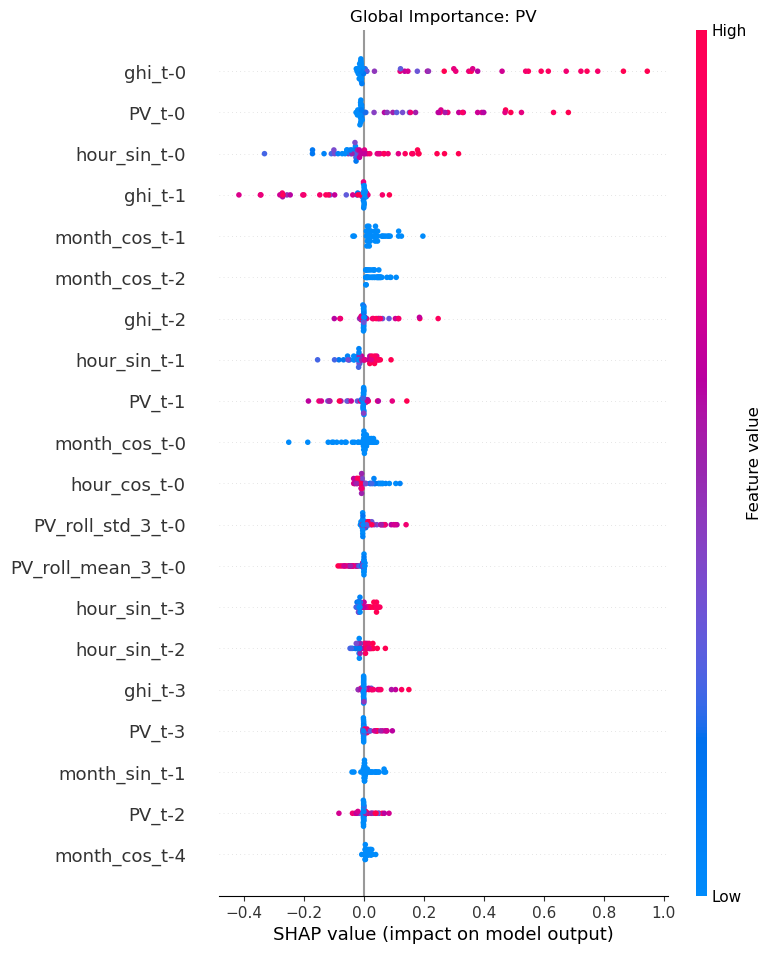

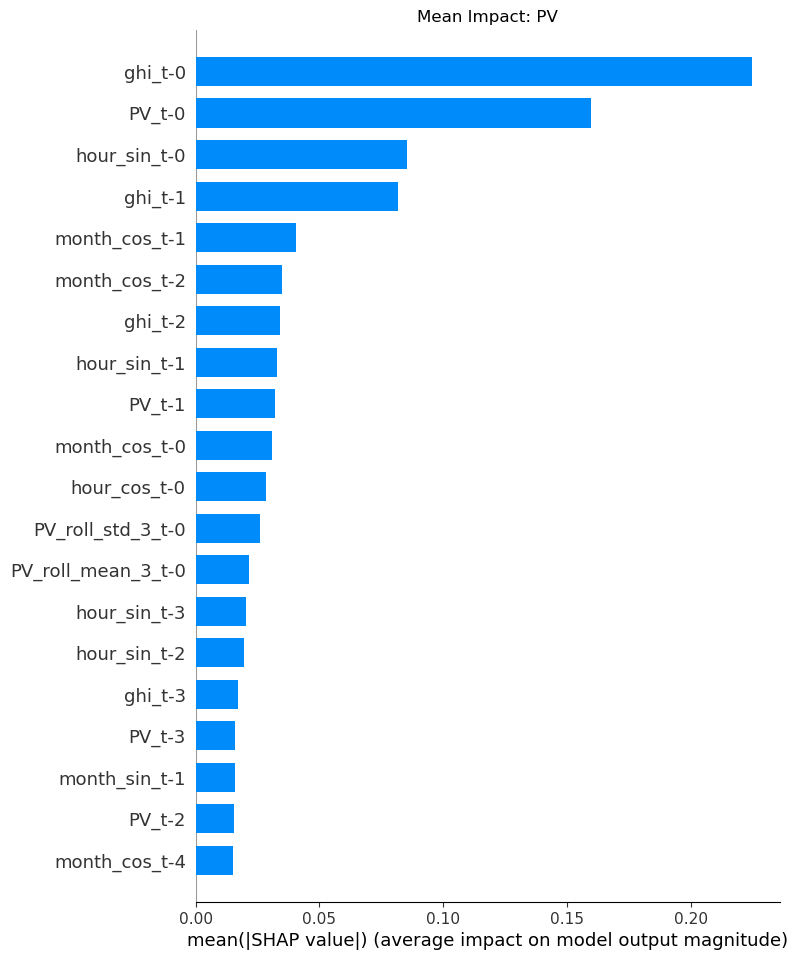

In [2]:

# Process data for target 0
current_shap_raw = np.array(all_shap_dict[0])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)

print(f"Generating plots for: PV")

# 1. Summary Plot
plt.figure()
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Global Importance: PV")
plt.show()

# 2. Bar Plot
plt.figure()
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False)
plt.title(f"Mean Impact: PV")
plt.show()


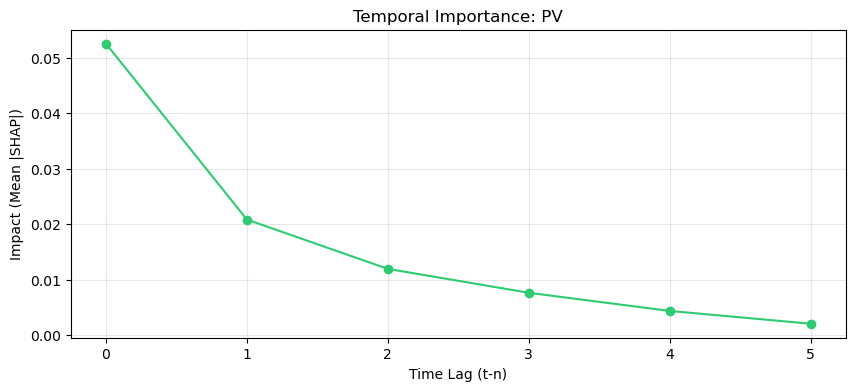

In [3]:

importance_over_time = np.abs(current_shap_raw).mean(axis=(0, 2))
plt.figure(figsize=(10, 4))
plt.plot(range(look_back-1, -1, -1), importance_over_time, marker='o', color='#2ecc71')
plt.title(f"Temporal Importance: PV")
plt.xlabel("Time Lag (t-n)")
plt.ylabel("Impact (Mean |SHAP|)")
plt.grid(True, alpha=0.3)
plt.show()
